<a href="https://colab.research.google.com/github/paulandrea0/tesis/blob/main/Solo%20GALERAS%20lpc_Galeras_%26_Italia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import math

df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_train.csv')
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_train.csv')

In [ ]:
isla = pd.read_csv('/gdrive/MyDrive/Sismos/Island_LP_11mil/lp_island.csv')
etna =  pd.read_csv('/gdrive/MyDrive/Sismos/ETNA/Etna50mil/VT_etna_16_oct.csv')
print(isla.shape, etna.shape)

(10999, 1600) (49999, 3000)


In [ ]:
df_VT = pd.concat([df_test_1, df_train_1], axis=0)
df_LP = pd.concat([df_test_2, df_train_2], axis=0)
df_TOR = pd.concat([df_test_3, df_train_3], axis=0)
print(df_VT.shape, df_LP.shape, df_TOR.shape)

(1736, 13348) (402, 3000) (67, 27408)


In [ ]:
x_VT = df_VT.values
x_LP = df_LP.values
x_TOR = df_TOR.values
x_isla = isla.values
x_etna = etna.values

x_VT[np.isnan(x_VT)] = 0.0
x_LP[np.isnan(x_LP)] = 0.0
x_TOR[np.isnan(x_TOR)] = 0.0
x_isla[np.isnan(x_isla)] = 0.0
x_etna[np.isnan(x_etna)] = 0.0

In [ ]:
x_VT = x_VT[:, 0:3000]
x_TOR = x_TOR[:, 0:3000]

x_isla = np.pad(x_isla, ((0, 0), (500, 900)), mode='constant', constant_values=(0))
print(x_VT.shape, x_LP.shape, x_TOR.shape, x_isla.shape, x_etna.shape)

(1736, 3000) (402, 3000) (67, 3000) (10999, 3000) (49999, 3000)


In [ ]:
from scipy.signal import butter, filtfilt

# Frecuencia de corte
fc = 0.8
fs = 100
t = np.linspace(0, 3, 3000)
# Orden del filtro
order = 6

# Coeficientes del filtro Butterworth
b, a = butter(order, fc / (fs/2), btype='highpass')

# Filtrando la señal VT
VT_filt = filtfilt(b, a, x_VT)
VT_freq = np.fft.fft(VT_filt)

# Filtrando la señal LP
LP_filt = filtfilt(b, a, x_LP)
LP_freq = np.fft.fft(LP_filt)

# Filtrando la señal TOR
TOR_filt = filtfilt(b, a, x_TOR)
TOR_freq = np.fft.fft(TOR_filt)

# Filtrando la señal isla
isla_filt = filtfilt(b, a, x_isla)
isla_freq = np.fft.fft(isla_filt)

# Filtrando la señal etna
etna_filt = filtfilt(b, a, x_etna)
etna_freq = np.fft.fft(etna_filt)

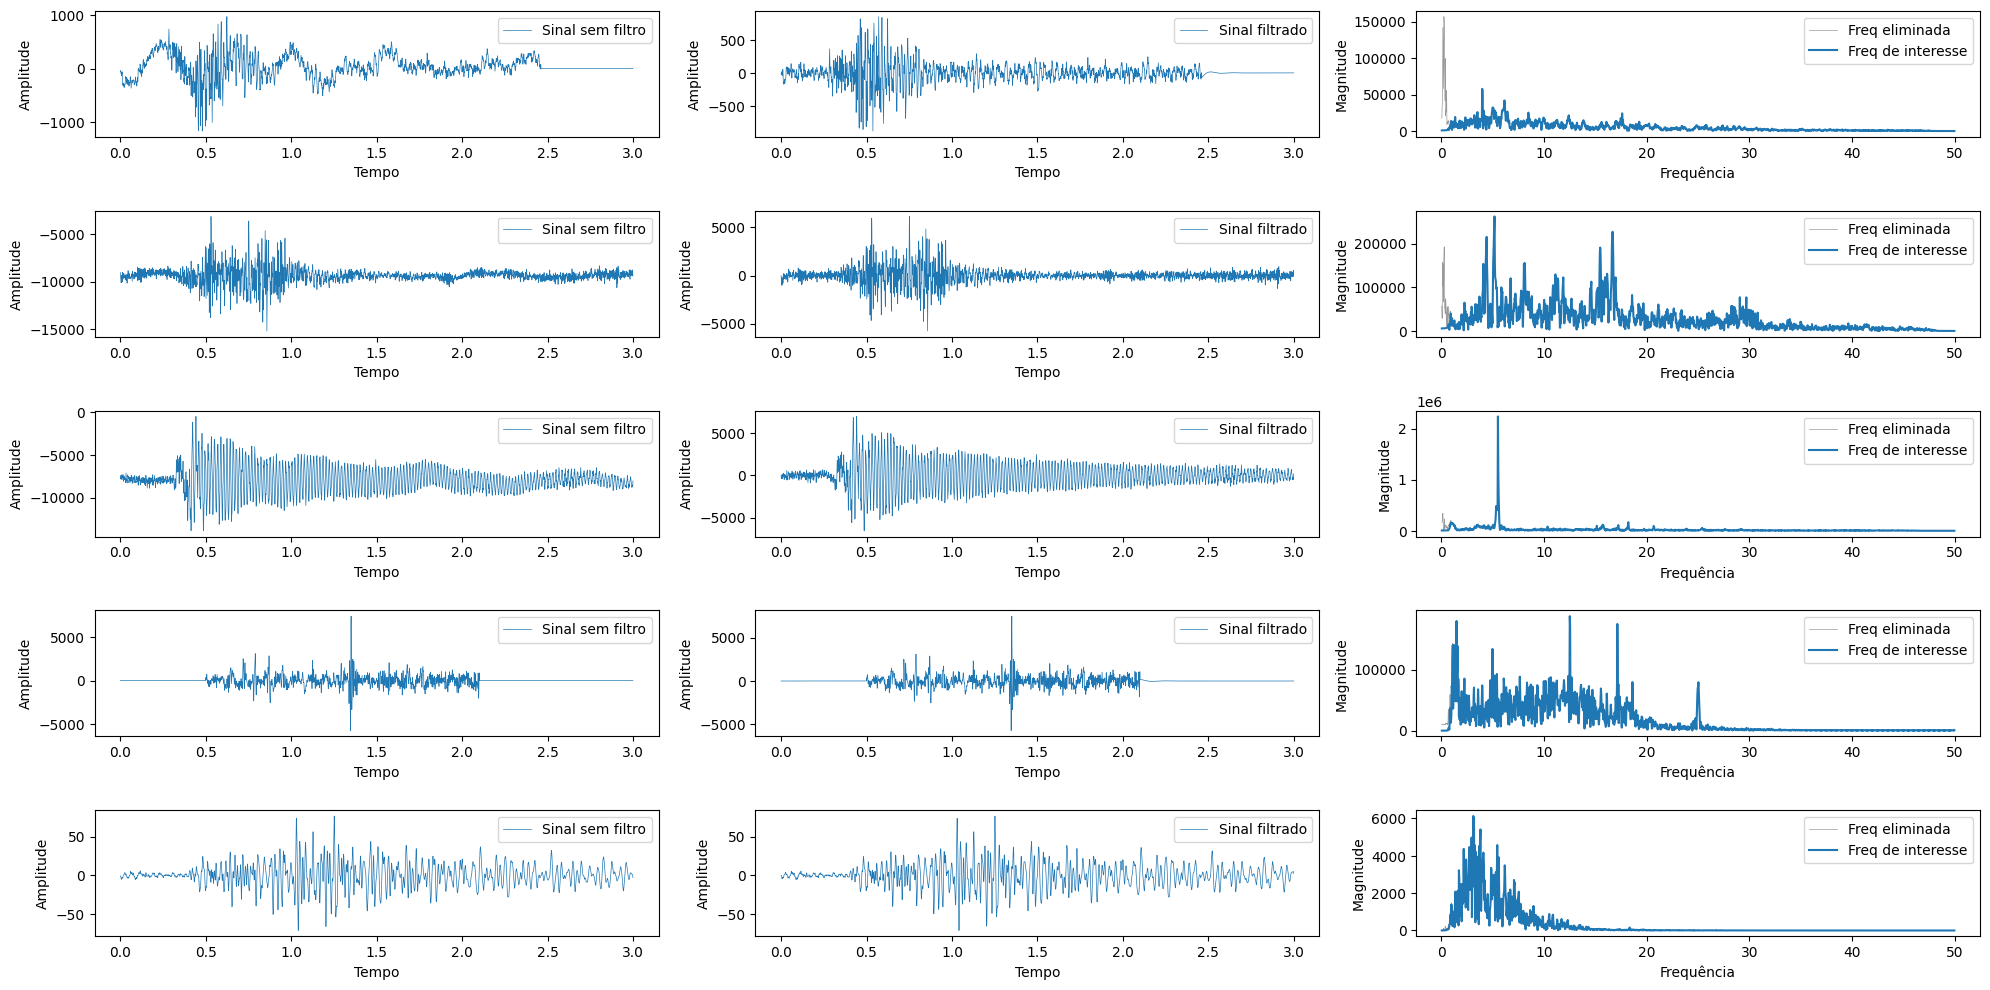

In [ ]:
import matplotlib.pyplot as plt

freq = np.fft.fftfreq((3000), 1/fs)
pos_mask = np.where(freq > 0)
freq_pos = freq[pos_mask]
sinal_aleatoria = np.random.randint(TOR_filt.shape[0])


# Define las clases y señales
classes = ["VT", "LP", "TOR", 'Isla', 'Etna']
signals = [x_VT, x_LP, x_TOR, x_isla, x_etna]
filtered_signals = [VT_filt, LP_filt, TOR_filt, isla_filt, etna_filt]
spectra = [VT_freq, LP_freq, TOR_freq, isla_freq, etna_freq]

# Configura la figura
fig, axs = plt.subplots(5, 3, figsize=(20, 10))

# Añade etiquetas y leyendas
for i, signal_class in enumerate(classes):
    axs[i, 0].plot(t, signals[i][sinal_aleatoria], lw=0.5, label='Sinal sem filtro')
    axs[i, 0].set(xlabel='Tempo', ylabel='Amplitude')
    axs[i, 0].legend()  # Añade la leyenda

    axs[i, 1].plot(t, filtered_signals[i][sinal_aleatoria], lw=0.5, label='Sinal filtrado')
    axs[i, 1].set(xlabel='Tempo', ylabel='Amplitude')
    axs[i, 1].legend()  # Añade la leyenda

    Y = np.fft.fft(signals[i][sinal_aleatoria])
    Y = Y[pos_mask]
    axs[i, 2].plot(freq_pos, np.abs(Y), "k", alpha=0.4, lw=0.5, label='Freq eliminada')
    axs[i, 2].set(xlabel='Frequência', ylabel='Magnitude')
    axs[i, 2].legend()  # Añade la leyenda

    X = spectra[i][sinal_aleatoria][pos_mask]
    axs[i, 2].plot(freq_pos, np.abs(X), label='Freq de interesse')
    axs[i, 2].legend()  # Añade la leyenda

# Ajusta el diseño
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
VT_s = min_max_scaler.fit_transform(VT_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}' .format(np.min(x_VT), np.max(x_VT)))
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}' .format(np.min(VT_s), np.max(VT_s)))

# Señales LP
LP_s = min_max_scaler.fit_transform(LP_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}' .format(np.min(x_LP), np.max(x_LP)))
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}' .format(np.min(LP_s), np.max(LP_s)))

# Señales Tor
TOR_s = min_max_scaler.fit_transform(TOR_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}' .format(np.min(x_TOR), np.max(x_TOR)))
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}' .format(np.min(TOR_s), np.max(TOR_s)))

Mínimo y máximo originales: -3875391.0, 3888217.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -160921.0, 141698.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -149434.0, 17077.0
Mínimo y máximo normalizado: 0.0, 1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# Normalización para VT
ISLA_s = []
for signal in isla_filt:
    signal_normalized = min_max_scaler.fit_transform(signal.reshape(-1, 1))
    ISLA_s.append(signal_normalized)
ISLA_s = np.array(ISLA_s)
ISLA_s = np.squeeze(ISLA_s, axis=-1)

# Normalización para LP
ETNA_s = []
for signal in etna_filt:
    signal_normalized = min_max_scaler.fit_transform(signal.reshape(-1, 1))
    ETNA_s.append(signal_normalized)
ETNA_s = np.array(ETNA_s)
ETNA_s = np.squeeze(ETNA_s, axis=-1)

In [ ]:
import numpy as np
import librosa

orden_lpc = 12

# LPC para señales VT
lpc_features_VT = []
for i in range(VT_s.shape[0]):
    signal = VT_s[i]  # Señal de una muestra
    lpc_coef = librosa.lpc(signal, order=orden_lpc)
    lpc_features_VT.append(lpc_coef)
lpc_VT = np.array(lpc_features_VT)

# LPC para señales LP
lpc_features_LP = []
for i in range(LP_s.shape[0]):
    signal = LP_s[i]  # Señal de una muestra
    lpc_coef = librosa.lpc(signal, order=orden_lpc)
    lpc_features_LP.append(lpc_coef)
lpc_LP = np.array(lpc_features_LP)

# LPC para señales TOR
lpc_features_TOR = []
for i in range(TOR_s.shape[0]):
    signal = TOR_s[i]  # Señal de una muestra
    lpc_coef = librosa.lpc(signal, order=orden_lpc)
    lpc_features_TOR.append(lpc_coef)
lpc_TOR = np.array(lpc_features_TOR)

# LPC para señales ISLA
lpc_features_ISLA = []
for i in range(ISLA_s.shape[0]):
    signal = ISLA_s[i]  # Señal de una muestra
    lpc_coef = librosa.lpc(signal, order=orden_lpc)
    lpc_features_ISLA.append(lpc_coef)
lpc_ISLA = np.array(lpc_features_ISLA)

# LPC para señales ETNA
lpc_features_ETNA = []
for i in range(ETNA_s.shape[0]):
    signal = ETNA_s[i]  # Señal de una muestra
    lpc_coef = librosa.lpc(signal, order=orden_lpc)
    lpc_features_ETNA.append(lpc_coef)
lpc_ETNA = np.array(lpc_features_ETNA)

# Ahora 'lpc_VT' contiene los coeficientes LPC para tus 1736 señales
print(lpc_VT.shape, lpc_LP.shape, lpc_TOR.shape, lpc_ISLA.shape, lpc_ETNA.shape)


(1736, 13) (402, 13) (67, 13) (10999, 13) (49999, 13)


In [ ]:
VT =  np.array(pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_18octubre23/VT_lpc.csv'))
LP =  np.array(pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/Matlab para calculo LPC/LP_lpc.csv'))
Tor = np.array(pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_18octubre23/lpc_02_nov/TOR_lpc.csv'))

In [ ]:
print(VT.shape, LP.shape, Tor.shape)

(1735, 13) (402, 13) (67, 13)


In [ ]:
import numpy as np

# Identificar valores NaN en VT, LP, Tor
nan_indices_X = np.isnan(VT)
nan_indices_y = np.isnan(LP)
nan_indices_z = np.isnan(Tor)

# Encontrar las filas que contienen NaN
rows_with_nan_X = np.any(nan_indices_X, axis=1)
rows_with_nan_y = np.any(nan_indices_y, axis=1)
rows_with_nan_z = np.any(nan_indices_z, axis=1)

# Imprimir las filas que contienen NaN
print("Filas con NaN en VT:")
print(np.where(rows_with_nan_X)[0])

print("Filas con NaN en LP:")
print(np.where(rows_with_nan_y)[0])

print("Filas con NaN en Tor:")
print(np.where(rows_with_nan_z)[0])

Filas con NaN en VT:
[]
Filas con NaN en LP:
[]
Filas con NaN en Tor:
[]


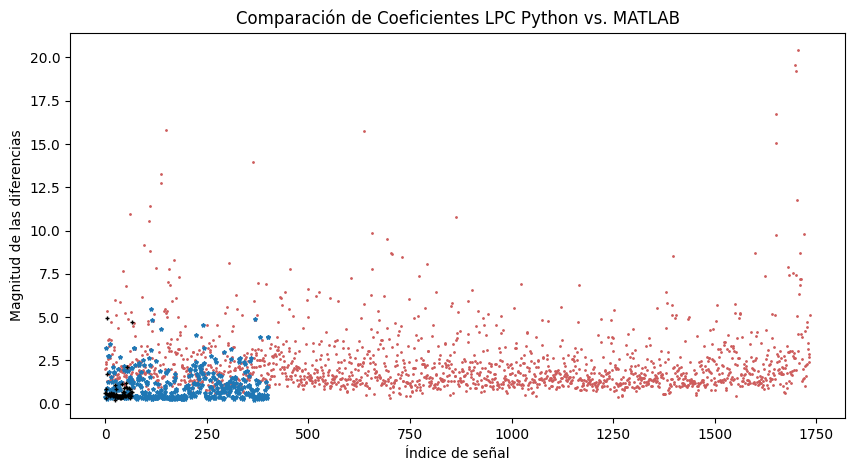

Media de las diferencias: 2.3350450180154385
Desviación estándar de las diferencias: 1.8594588688313156
Media de las diferencias: 1.0536599662924442
Desviación estándar de las diferencias: 0.8753416413898475
Media de las diferencias: 0.73238217093065
Desviación estándar de las diferencias: 0.7820604998440605


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que lpc_python contiene los coeficientes LPC calculados en Python (forma: [1736, 13])
# y lpc_matlab contiene los coeficientes LPC calculados en MATLAB (forma: [1736, 13])

# Calcula las diferencias entre los coeficientes LPC
diferencias_VT = lpc_VT[1735, :] - VT
diferencias_LP = lpc_LP - LP
diferencias_TOR = lpc_TOR - Tor

# Calcula la magnitud de las diferencias (puedes usar diferentes métricas, como la norma L2)
diferencias_VT = np.linalg.norm(diferencias_VT, axis=1)
diferencias_LP = np.linalg.norm(diferencias_LP, axis=1)
diferencias_TOR = np.linalg.norm(diferencias_TOR, axis=1)

# Grafica la magnitud de las diferencias
plt.figure(figsize=(10, 5))
plt.plot(diferencias_VT, marker='o', linestyle='', markersize=1, color='indianred')
plt.plot(diferencias_LP, marker='*', linestyle='', markersize=3, color='tab:blue')
plt.plot(diferencias_TOR, marker='+', linestyle='', markersize=3, color='k')
plt.xlabel('Índice de señal')
plt.ylabel('Magnitud de las diferencias')
plt.title('Comparación de Coeficientes LPC Python vs. MATLAB')
plt.show()

# Calcula estadísticas descriptivas de las diferencias
media_dif_VT = np.mean(diferencias_VT)
desviacion_VT = np.std(diferencias_VT)

print("Media de las diferencias:", media_dif_VT)
print("Desviación estándar de las diferencias:", desviacion_VT)

media_dif_LP = np.mean(diferencias_LP)
desviacion_LP = np.std(diferencias_LP)

print("Media de las diferencias:", media_dif_LP)
print("Desviación estándar de las diferencias:", desviacion_LP)

media_dif_TOR = np.mean(diferencias_TOR)
desviacion_TOR = np.std(diferencias_TOR)

print("Media de las diferencias:", media_dif_TOR)
print("Desviación estándar de las diferencias:", desviacion_TOR)

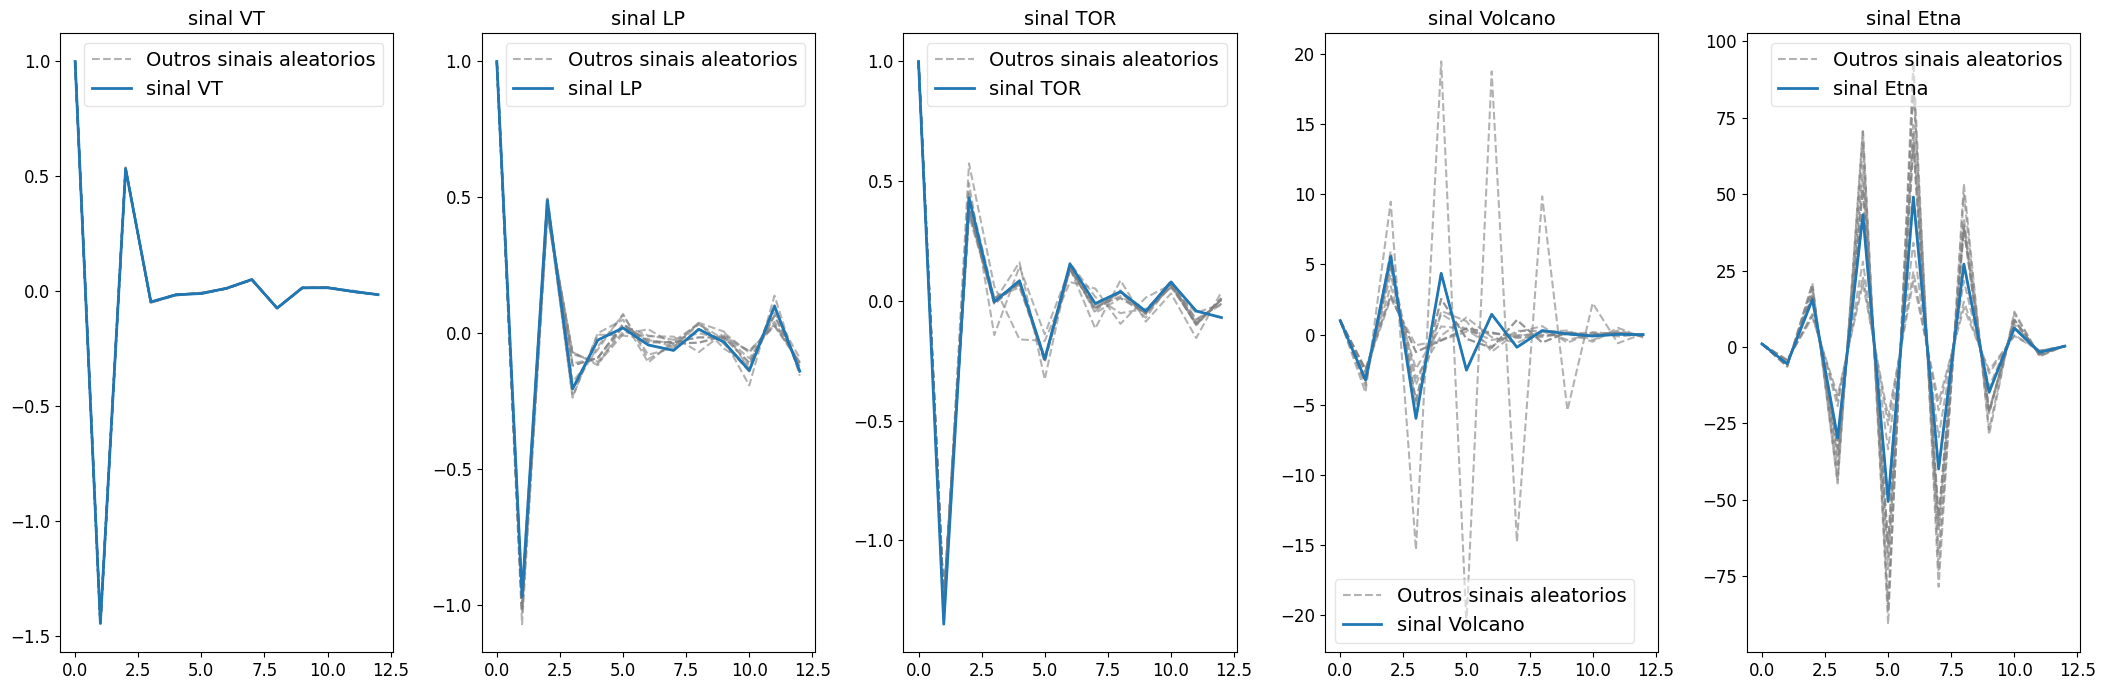

In [ ]:
# Graficando
# Definiendo las clases:
signals_class = [lpc_VT, lpc_LP, lpc_TOR, lpc_ISLA, lpc_ETNA]

max_signals_per_class = 10
class_names = ['sinal VT', 'sinal LP', 'sinal TOR', 'sinal Volcano', 'sinal Etna']

fig, axs = plt.subplots(1, 5, figsize=(21, 7))

# Iterar sobre las clases y los subplots
for class_idx, signal_class in enumerate(signals_class):
  ax = axs[class_idx]   # Obtener el subplot actual

  # Limitar el número de señales a dibujar por clase
  signal_class = signal_class[:max_signals_per_class]

  # Iterar sobre las señales de la clase y ajustar las propiedades de línea
  for i , signal in enumerate(signal_class):
    # Las señales aleatorias
    ax.plot(signal, linestyle='--', alpha=0.6, label=None, color="grey")

  # primera señal con línea sólida y grosor 2
  ax.plot(signal, linestyle='--', alpha=0.6, label="Outros sinais aleatorios", color="grey")
  ax.plot(signal_class[0], lw=2, label=(class_names[class_idx]), color="tab:blue")

  # Añadir leyenda y etiquetas
  ax.legend(fontsize='14', fancybox=True, framealpha=0.5)
  ax.tick_params(axis='both', labelsize=12)
  ax.set_title(class_names[class_idx], fontsize=14)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Guardar el gráfico en formato PDF con resolución de 300 DPI
plt.savefig("grafico.pdf", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

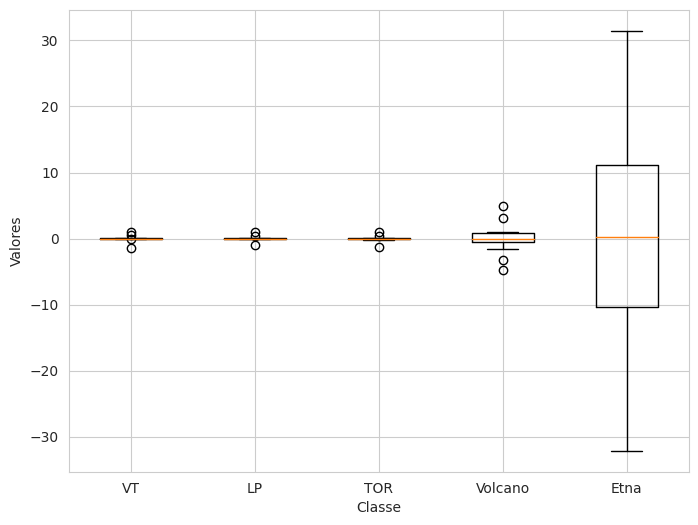

In [ ]:
import pandas as pd

vt_df = pd.DataFrame(lpc_VT, columns=[f"VT_Signal_{i+1}" for i in range(lpc_VT.shape[1])])
lp_df = pd.DataFrame(lpc_LP, columns=[f"LP_Signal_{i+1}" for i in range(lpc_LP.shape[1])])
tor_df = pd.DataFrame(lpc_TOR, columns=[f"TOR_Signal_{i+1}" for i in range(lpc_TOR.shape[1])])
isla_df = pd.DataFrame(lpc_ISLA, columns=[f"Volcano_Signal_{i+1}" for i in range(lpc_ISLA.shape[1])])
etna_df = pd.DataFrame(lpc_ETNA, columns=[f"Etna_Signal_{i+1}" for i in range(lpc_ETNA.shape[1])])

# Estadísticas descriptivas por clase
vt_stats = vt_df.describe()
lp_stats = lp_df.describe()
tor_stats = tor_df.describe()
isla_stats = isla_df.describe()
etna_stats = etna_df.describe()

# Visualización por clase (gráfico de caja)
plt.figure(figsize=(8, 6))
plt.boxplot([vt_stats.loc['mean'], lp_stats.loc['mean'], tor_stats.loc['mean'], isla_stats.loc['mean'], etna_stats.loc['mean']],
            labels=['VT', 'LP', 'TOR', 'Volcano', 'Etna'])
plt.xlabel('Classe')
plt.ylabel('Valores')
#plt.title('Distribución por clase (Boxplot de las medias)')
plt.show()

In [ ]:
import numpy as np

# # Combina todas las representaciones en un solo conjunto de datos
# all_data = np.vstack((lpc_VT, lpc_LP, lpc_TOR, lpc_ISLA[:5000, :], lpc_ETNA[:8000, :]))

# # Calcula la matriz de correlación entre clases
# correlation_between_classes = np.corrcoef(all_data.T)

mean_vt = np.mean(lpc_VT, axis=0)
mean_lp = np.mean(lpc_LP, axis=0)
mean_tor = np.mean(lpc_TOR, axis=0)
mean_isla = np.mean(lpc_ISLA, axis=0)
mean_etna = np.mean(lpc_ETNA, axis=0)

# Combina las representaciones promedio en un conjunto de datos
mean_data = np.vstack((mean_vt, mean_lp, mean_tor, mean_isla, mean_etna))

# Calcula la matriz de correlación entre las representaciones promedio de cada clase
correlation_between_classes = np.corrcoef(mean_data)

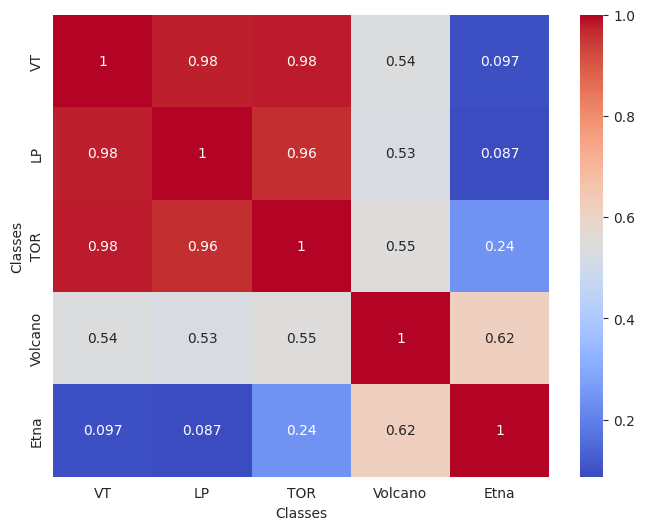

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un mapa de calor para visualizar la matriz de correlación entre clases
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_between_classes, cmap='coolwarm', annot=True,
            xticklabels=['VT', 'LP', 'TOR', 'Volcano', 'Etna'],
            yticklabels=['VT', 'LP', 'TOR', 'Volcano', 'Etna'])
#plt.title('Matriz de Correlación entre Clases')
plt.xlabel('Classes')
plt.ylabel('Classes')
plt.show()

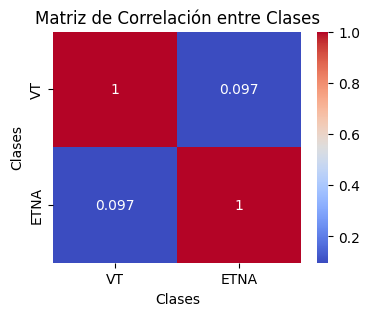

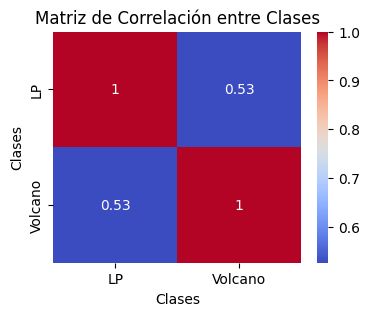

In [ ]:
mean_vt_etna = np.vstack((mean_vt, mean_etna))
# Calcula la matriz de correlación entre las representaciones promedio de cada clase
correlation_between_classes = np.corrcoef(mean_vt_etna)

# Crea un mapa de calor para visualizar la matriz de correlación entre clases
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_between_classes, cmap='coolwarm', annot=True,
            xticklabels=['VT', 'ETNA'],
            yticklabels=['VT',  'ETNA'])
plt.title('Matriz de Correlación entre Clases')
plt.xlabel('Clases')
plt.ylabel('Clases')
plt.show()


mean_lp_isla = np.vstack((mean_lp, mean_isla))
# Calcula la matriz de correlación entre las representaciones promedio de cada clase
correlation_between_classes = np.corrcoef(mean_lp_isla)

# Crea un mapa de calor para visualizar la matriz de correlación entre clases
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_between_classes, cmap='coolwarm', annot=True,
            xticklabels=['LP', 'Volcano'],
            yticklabels=['LP', 'Volcano'])
plt.title('Matriz de Correlación entre Clases')
plt.xlabel('Clases')
plt.ylabel('Clases')
plt.show()

# LDA

In [ ]:
import numpy as np

# Combina los datos en un solo conjunto de datos
X_lda = np.vstack((lpc_VT, lpc_LP, lpc_TOR, lpc_ISLA, lpc_ETNA))

# Crea un vector de etiquetas y correspondiente a las clases
n_vt, n_lp, n_tor, n_isla, n_etna = len(lpc_VT), len(lpc_LP), len(lpc_TOR), len(lpc_ISLA), len(lpc_ETNA)
y_lda = np.hstack((np.zeros(n_vt), np.ones(n_lp), 2 * np.ones(n_tor), 3 * np.ones(n_isla), 4 * np.ones(n_etna)))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt


# Inicializa el modelo LDA
lda = LDA()

# Ajusta el modelo LDA a tus datos
X_LDA = lda.fit_transform(X_lda, y_lda)

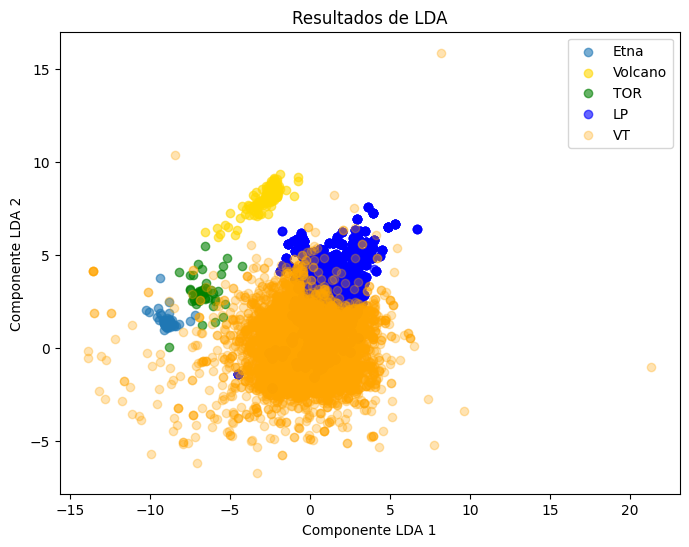

In [ ]:
# Grafica los datos transformados por LDA
plt.figure(figsize=(8, 6))

# Selecciona colores diferentes para cada clase
colors = ['tab:blue', 'gold', 'g', 'b', 'orange']
labels = ['Etna', 'Volcano', 'TOR', 'LP', 'VT']

for i in range(len(labels)):
    if labels[i] == 'VT':
        plt.scatter(X_LDA[y_lda == i, 0], X_LDA[y_lda == i, 1], c=colors[i], label=labels[i], alpha=0.3)
    else:
        plt.scatter(X_LDA[y_lda == i, 0], X_LDA[y_lda == i, 1], c=colors[i], label=labels[i], alpha=0.6)

plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
# plt.title('Resultados de LDA')
plt.legend()
plt.show()

# UMAP

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=6427f1e6df13815dc9cad727507923ab378a87b5c9849732b1106345fae5f569
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import umap

# Combina tus datos en un solo conjunto de datos
X_umap = np.vstack((lpc_VT, lpc_LP, lpc_TOR, lpc_ISLA, lpc_ETNA))

# Crea un vector de etiquetas y correspondiente a las clases
n_vt, n_lp, n_tor, n_isla, n_etna = len(lpc_VT), len(lpc_LP), len(lpc_TOR), len(lpc_ISLA), len(lpc_ETNA)
y_umap = np.hstack((np.zeros(n_vt), np.ones(n_lp), 2 * np.ones(n_tor), 3 * np.ones(n_isla), 4 * np.ones(n_etna)))

# Aplica UMAP para reducir la dimensionalidad a 2 dimensiones
umap_embedding = umap.UMAP(n_components=3).fit_transform(X_umap, y_umap)

KeyboardInterrupt: ignored

In [ ]:
# Grafica los datos transformados por UMAP en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Selecciona colores diferentes para cada clase
colors = ['r', 'g', 'b', 'c', 'm']
labels = ['VT', 'LP', 'TOR', 'Volcano', 'ETNA']

for i in range(len(labels)):
    ax.scatter(umap_embedding[y == i, 0], umap_embedding[y == i, 1], umap_embedding[y == i, 2],
               c=colors[i], label=labels[i], alpha=0.7)

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('UMAP Visualization in 3D')
ax.legend()
plt.show()

# continuanco com Classificaçõa

In [ ]:
############################################### CLASE VT
total_filas = lpc_VT.shape[0]
filas_entrenamiento = int(0.6 * total_filas)
filas_prueba = int(0.2 * total_filas)
train_1 = lpc_VT[:filas_entrenamiento]
test_1 = lpc_VT[filas_entrenamiento:filas_entrenamiento + filas_prueba]
val_1 = lpc_VT[filas_entrenamiento + filas_prueba:]
#val_1 = np.concatenate((val_1, lpc_ETNA), axis=0)

# Crear el vector de etiquetas
y_train_1 = np.zeros(train_1.shape[0])
y_test_1 = np.zeros(test_1.shape[0])
y_val_1 = np.zeros(val_1.shape[0])
# Adicionando el vector de etiquetas a la primera columna de los subconjuntos
y_train_1 = np.expand_dims(y_train_1, axis=1)
y_test_1 = np.expand_dims(y_test_1, axis=1)
y_val_1 = np.expand_dims(y_val_1, axis=1)
train_1 = np.concatenate((y_train_1, train_1), axis=1)
test_1 = np.concatenate((y_test_1, test_1), axis=1)
val_1 = np.concatenate((y_val_1, val_1), axis=1)

################################################# CLASE lP
total_filas = lpc_LP.shape[0]
filas_entrenamiento = int(0.6 * total_filas)
filas_prueba = int(0.2 * total_filas)
train_2 = lpc_LP[:filas_entrenamiento]
test_2 = lpc_LP[filas_entrenamiento:filas_entrenamiento + filas_prueba]
val_2 = lpc_LP[filas_entrenamiento + filas_prueba:]
#val_2 = np.concatenate((val_2, lpc_ISLA), axis=0)

# Crear el vector de etiquetas
y_train_2 = np.ones(train_2.shape[0])
y_test_2 = np.ones(test_2.shape[0])
y_val_2 = np.ones(val_2.shape[0])
# Adicionando el vector de etiquetas a la primera columna de los subconjuntos
y_train_2 = np.expand_dims(y_train_2, axis=1)
y_test_2 = np.expand_dims(y_test_2, axis=1)
y_val_2 = np.expand_dims(y_val_2, axis=1)
train_2 = np.concatenate((y_train_2, train_2), axis=1)
test_2 = np.concatenate((y_test_2, test_2), axis=1)
val_2 = np.concatenate((y_val_2, val_2), axis=1)

################################################ CLASE TOR
total_filas = lpc_TOR.shape[0]
filas_entrenamiento = int(0.6 * total_filas)
filas_prueba = int(0.2 * total_filas)
train_3 = lpc_TOR[:filas_entrenamiento]
test_3 = lpc_TOR[filas_entrenamiento:filas_entrenamiento + filas_prueba]
val_3 = lpc_TOR[filas_entrenamiento + filas_prueba:]
# Crear el vector de etiquetas
y_train_3 = 2 * np.ones(train_3.shape[0])
y_test_3 = 2 * np.ones(test_3.shape[0])
y_val_3 = 2 * np.ones(val_3.shape[0])
# Adicionando el vector de etiquetas a la primera columna de los subconjuntos
y_train_3 = np.expand_dims(y_train_3, axis=1)
y_test_3 = np.expand_dims(y_test_3, axis=1)
y_val_3 = np.expand_dims(y_val_3, axis=1)
train_3 = np.concatenate((y_train_3, train_3), axis=1)
test_3 = np.concatenate((y_test_3, test_3), axis=1)
val_3 = np.concatenate((y_val_3, val_3), axis=1)

# CONCATENENDO LOS SUBCONJUNTO train, test & val
X_train = np.concatenate((train_1, train_2, train_3), axis=0)
X_test = np.concatenate((test_1, test_2, test_3), axis=0)
X_val = np.concatenate((val_1, val_2, val_3), axis=0)
print(X_train.shape, X_test.shape, X_val.shape)

#  APLICANDO SHUFFLE EN LOS 3 SUBCONJUNTOS
np.random.shuffle(X_train)
np.random.shuffle(X_test)
np.random.shuffle(X_val)
train_counts = np.unique(X_train[:,0], return_counts=True)
test_counts = np.unique(X_test[:,0], return_counts=True)
val_counts = np.unique(X_val[:,0], return_counts=True)
print("Distribución de las clases en X_train:", train_counts)
print("Distribución de las clases en X_test:", test_counts)
print("Distribución de las clases en X_val:", val_counts)

# SEPARANDO VECTOR ETIQUETAS EN CADA SUBCONJUNTO
y_train = X_train[:, 0]
y_test =X_test[:, 0]
y_val = X_val[:, 0]
print(y_train.shape, y_test.shape, y_val.shape)

X_train = X_train[:, 1:]
X_test = X_test[:, 1:]
X_val = X_val[:, 1:]
print(X_train.shape, X_test.shape, X_val.shape)


train_y = np.unique(y_train[:], return_counts=True)
test_y = np.unique(y_test[:], return_counts=True)
val_y = np.unique(y_val[:], return_counts=True)
print("Distribución en las etiquetas es:", train_y)
print("Distribución en las etiquetas es:", test_y)
print("Distribución en las etiquetas es:", val_y)

(1322, 14) (440, 14) (443, 14)
Distribución de las clases en X_train: (array([0., 1., 2.]), array([1041,  241,   40]))
Distribución de las clases en X_test: (array([0., 1., 2.]), array([347,  80,  13]))
Distribución de las clases en X_val: (array([0., 1., 2.]), array([348,  81,  14]))
(1322,) (440,) (443,)
(1322, 13) (440, 13) (443, 13)
Distribución en las etiquetas es: (array([0., 1., 2.]), array([1041,  241,   40]))
Distribución en las etiquetas es: (array([0., 1., 2.]), array([347,  80,  13]))
Distribución en las etiquetas es: (array([0., 1., 2.]), array([348,  81,  14]))


In [ ]:
num_classes = 3
num_indices_por_clase = 5
# Crea un diccionario para almacenar los índices aleatorios en TRAIN
rand_train = {}
# Genera índices aleatorios para cada clase
for clase in range(num_classes):
    indices_clase = np.where(y_train == clase)[0]  # Encuentra los índices de elementos en la clase actual
    rand_train[clase] = np.random.choice(indices_clase, num_indices_por_clase, replace=False)
print(rand_train)

# Crea un diccionario para almacenar los índices aleatorios en TEST
rand_test = {}
# Genera índices aleatorios para cada clase
for clase in range(num_classes):
    indices_clase = np.where(y_test == clase)[0]  # Encuentra los índices de elementos en la clase actual
    rand_test[clase] = np.random.choice(indices_clase, num_indices_por_clase, replace=False)
print(rand_test)

# Crea un diccionario para almacenar los índices aleatorios en VAL
rand_val = {}
# Genera índices aleatorios para cada clase
for clase in range(num_classes):
    indices_clase = np.where(y_val == clase)[0]  # Encuentra los índices de elementos en la clase actual
    rand_val[clase] = np.random.choice(indices_clase, num_indices_por_clase, replace=False)
print(rand_val)

{0: array([1255,  121,   41,  372,  573]), 1: array([491,  75, 941, 649,   9]), 2: array([828,  37, 305, 493, 393])}
{0: array([136, 329, 108,  41, 109]), 1: array([358, 122, 400, 279, 391]), 2: array([ 92, 343, 370, 270,  20])}
{0: array([42284, 12277, 40172,  7670, 15584]), 1: array([ 4751,  9667, 40618,  3692, 61138]), 2: array([ 5176,   164, 44750, 35777, 57470])}


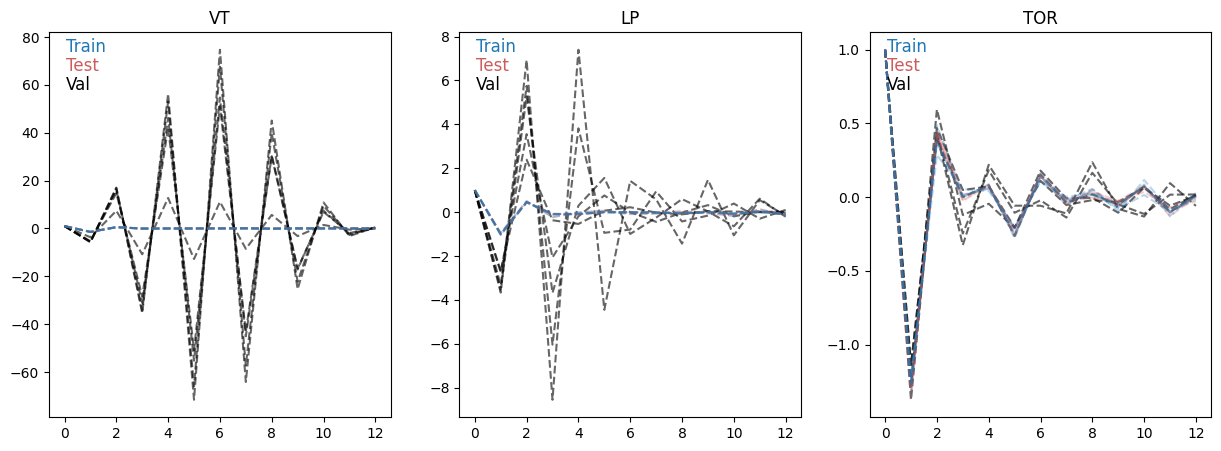

In [ ]:
train_label = 'Train'
test_label = 'Test'
val_label = 'Val'
# Crea figuras y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Índices para cada clase
class_indices_train = {
    0: rand_train[0],
    1: rand_train[1],
    2: rand_train[2],
}

class_indices_test = {
    0: rand_test[0],
    1: rand_test[1],
    2: rand_test[2],
}

class_indices_val = {
    0: rand_val[0],
    1: rand_val[1],
    2: rand_val[2],
}

# Etiquetas
class_labels = {
    0: 'VT',
    1: 'LP',
    2: 'TOR',
}

for i, ax in enumerate(axs):
    clase = i
    label = class_labels[clase]

       # Graficar señales de 'Val' en negro
    for idx in class_indices_val[clase]:
        ax.plot(X_val[idx, :], linestyle='--', color='k', alpha=0.6)

        # Graficar señales de 'Test' en rojo
    for idx in class_indices_test[clase]:
        ax.plot(X_test[idx, :], linestyle='--', color='indianred', alpha=0.3)

    # Graficar señales de 'Train' en azul
    for idx in class_indices_train[clase]:
        ax.plot(X_train[idx, :], linestyle='--', color='tab:blue', alpha=0.3)


    ax.set_title(label)
    #ax.set_xticks([])  # Remover marcas del eje x
    ax.text(0.05, 0.95, train_label, transform=ax.transAxes, color='tab:blue', fontsize=12)
    ax.text(0.05, 0.9, test_label, transform=ax.transAxes, color='indianred', fontsize=12)
    ax.text(0.05, 0.85, val_label, transform=ax.transAxes, color='k', fontsize=12)

plt.show()

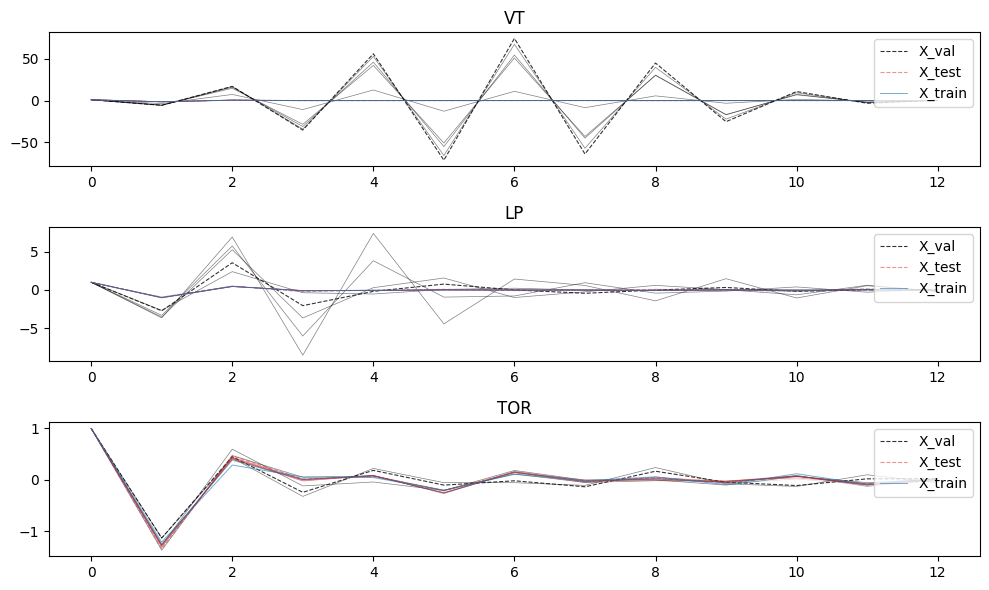

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(rand_train), 1, figsize=(10, 6))

# Configurar etiquetas para las matrices
matrix_labels = ['X_train', 'X_test', 'X_val']

# Definir cuántas señales finales se trazarán con línea continua
num_final_signals = 1  # Puedes ajustar este valor según tus necesidades

# Definir los títulos personalizados para cada clase o matriz
class_titles = ['VT', 'LP', 'TOR']  # Puedes ajustar estos títulos

# Iterar sobre las clases y sus índices

for i, (class_name, indices) in enumerate(rand_val.items()):
    ax = axs[i]
    signals = X_val[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='k', lw=0.5, alpha=0.5)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[2], color='k', linestyle='--', lw=0.8, alpha=0.8)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_test.items()):
    ax = axs[i]
    signals = X_test[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:red', lw=0.5, alpha=0.5)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[1], color='tab:red', linestyle='--', lw=0.8, alpha=0.5)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_train.items()):
    ax = axs[i]
    signals = X_train[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:blue', lw=0.5, alpha=0.2)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[0], color='tab:blue', linestyle='-', lw=0.7, alpha=0.6)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Representación LPC

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Ajusta el escalador a los datos de entrenamiento
min_max_scaler.fit(X_train)

# Aplica la transformación a todos los conjuntos de datos
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)
X_val = min_max_scaler.transform(X_val)


guardando datos como .csv

In [ ]:
import numpy as np

'''
# Suponiendo que tienes los conjuntos X_train, X_test, X_val y las etiquetas correspondientes
# Crear un diccionario para almacenar los datos separados por clase
data_by_class = {}

# Separar los datos por clase utilizando las etiquetas
for class_label in np.unique(y_train):
    # Filtrar los datos para la clase actual
    X_train_class = X_train[y_train == class_label]
    X_test_class = X_test[y_test == class_label]
    X_val_class = X_val[y_val == class_label]

    # Almacena los datos de la clase actual en el diccionario
    data_by_class[class_label] = {
        'X_train': X_train_class,
        'X_test': X_test_class,
        'X_val': X_val_class
    }

# Ahora data_by_class contiene los datos separados por clase
# Puedes acceder a los datos de cada clase usando las etiquetas de clase como clave
# Por ejemplo, para obtener los datos de entrenamiento de la clase VT:

# Crear diccionario para almacenar los datos concatenados por clase
concatenated_data_by_class = {}

# Iterar sobre las clases en el diccionario data_by_class
for class_label, class_data in data_by_class.items():
    # Obtener los datos de cada conjunto
    X_train_class = class_data['X_train']
    X_test_class = class_data['X_test']
    X_val_class = class_data['X_val']
    # Concatenar los datos de entrenamiento, prueba y validación por clase
    concatenated_data = pd.concat([pd.DataFrame(X_train_class),
                                   pd.DataFrame(X_test_class),
                                   pd.DataFrame(X_val_class)])

    # Almacenar los datos concatenados en el nuevo diccionario por clase
    concatenated_data_by_class[class_label] = concatenated_data

# Guardar los datos concatenados en archivos CSV separados por clase
for class_label, concatenated_data in concatenated_data_by_class.items():
    concatenated_data.to_csv(f'clase_{class_label}_concatenated.csv', index=False)
    '''

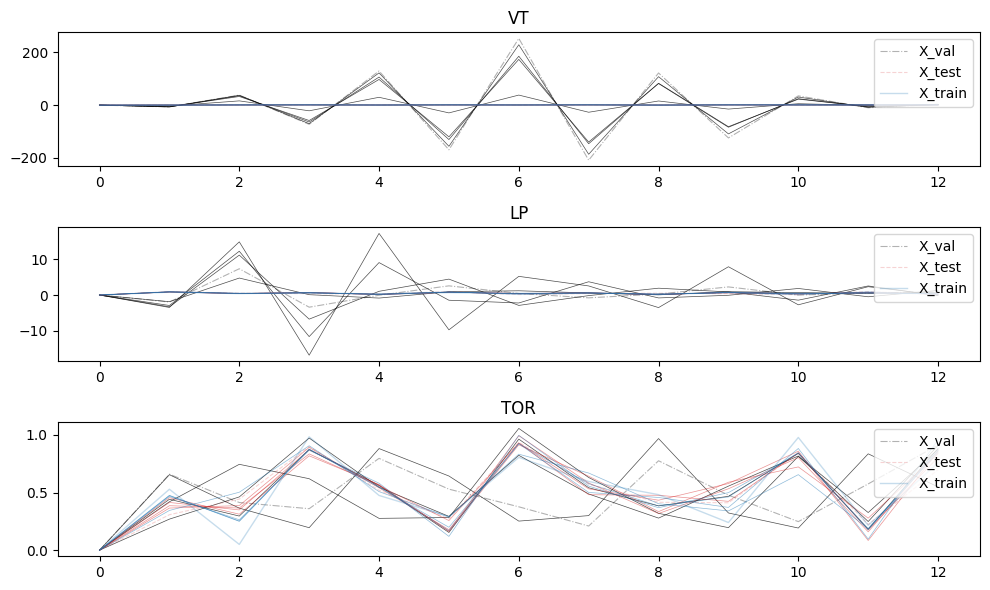

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(rand_train), 1, figsize=(10, 6))

# Configurar etiquetas para las matrices
matrix_labels = ['X_train', 'X_test', 'X_val']

# Definir cuántas señales finales se trazarán con línea continua
num_final_signals = 1  # Puedes ajustar este valor según tus necesidades

# Definir los títulos personalizados para cada clase o matriz
class_titles = ['VT', 'LP', 'TOR']  # Puedes ajustar estos títulos

# Iterar sobre las clases y sus índices
for i, (class_name, indices) in enumerate(rand_val.items()):
    ax = axs[i]
    signals = X_val[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='k', lw=0.5, alpha=0.7)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[2], color='k', linestyle='-.', lw=0.8, alpha=0.3)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_test.items()):
    ax = axs[i]
    signals = X_test[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:red', lw=0.5, alpha=0.5)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[1], color='tab:red', linestyle='--', lw=0.8, alpha=0.2)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

for i, (class_name, indices) in enumerate(rand_train.items()):
    ax = axs[i]
    signals = X_train[indices]  # Extraer las señales de la clase

    # Graficar las señales de la clase en el subplot actual con transparencia
    for j, signal in enumerate(signals[:-num_final_signals]):
        ax.plot(signal, label=None, color='tab:blue', lw=0.5, alpha=0.5)

    # Graficar las últimas señales de la clase con línea continua y etiqueta de la matriz
    for signal in signals[-num_final_signals:]:
        ax.plot(signal, label=matrix_labels[0], color='tab:blue', linestyle='-', lw=1, alpha=0.25)

    ax.set_title(class_titles[i])  # Establecer el título personalizado
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

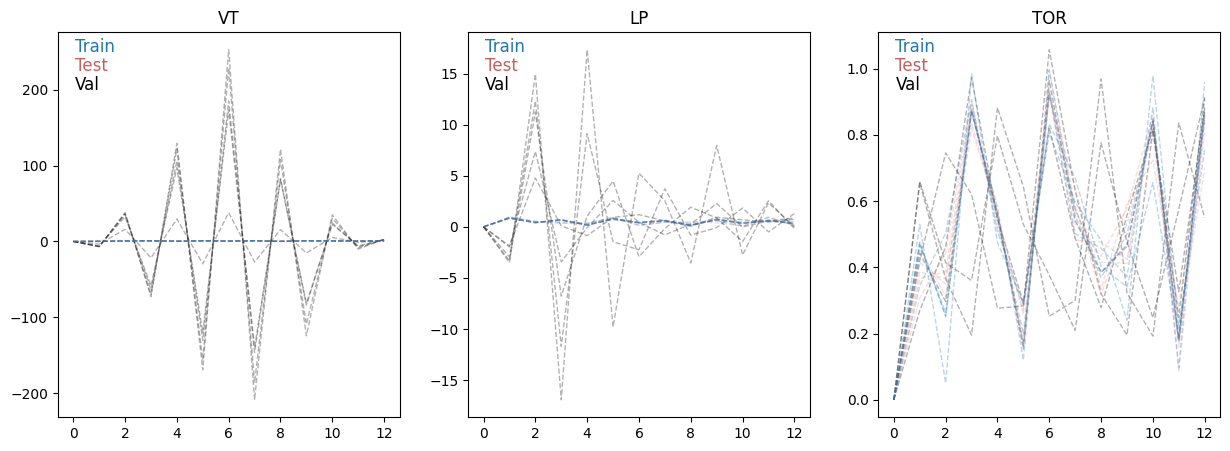

In [ ]:
train_label = 'Train'
test_label = 'Test'
val_label = 'Val'
# Crea figuras y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Índices para cada clase
class_indices_train = {
    0: rand_train[0],
    1: rand_train[1],
    2: rand_train[2],
}

class_indices_test = {
    0: rand_test[0],
    1: rand_test[1],
    2: rand_test[2],
}

class_indices_val = {
    0: rand_val[0],
    1: rand_val[1],
    2: rand_val[2],
}

# Etiquetas
class_labels = {
    0: 'VT',
    1: 'LP',
    2: 'TOR',
}

for i, ax in enumerate(axs):
    clase = i
    label = class_labels[clase]

       # Graficar señales de 'Val' en negro
    for idx in class_indices_val[clase]:
        ax.plot(X_val[idx, :], linestyle='--', color='k', alpha=0.3, lw=1)

        # Graficar señales de 'Test' en rojo
    for idx in class_indices_test[clase]:
        ax.plot(X_test[idx, :], linestyle='--', color='indianred', alpha=0.2, lw=1)

    # Graficar señales de 'Train' en azul
    for idx in class_indices_train[clase]:
        ax.plot(X_train[idx, :], linestyle='--', color='tab:blue', alpha=0.3, lw=1)


    ax.set_title(label)
    #ax.set_xticks([])  # Remover marcas del eje x
    ax.text(0.05, 0.95, train_label, transform=ax.transAxes, color='tab:blue', fontsize=12)
    ax.text(0.05, 0.9, test_label, transform=ax.transAxes, color='indianred', fontsize=12)
    ax.text(0.05, 0.85, val_label, transform=ax.transAxes, color='k', fontsize=12)

plt.show()

# **Classificação com MLPerceptron**

In [ ]:
# concatenamos X_train y X_test, además de y_train con y_test
X = np.concatenate((X_train, X_test), axis=0)
print(X.shape)
y = np.concatenate((y_train, y_test), axis=0)
print(y.shape)

(1762, 13)
(1762,)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización
# a decartar valores altos en la función de costo. Se puede colocar en cualq
from keras.layers import Dropout #apagar aleatoriamente algunas neuronas,
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping
from keras.activations import relu, sigmoid, tanh
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Escogiendo el Modelo (by Reginaldo)

In [ ]:
dados = X
rotulos = y
# Definir o número de folds para a validação cruzada
k = 6

lw = 1

# inicializar a lista para armazenar os tempos de treinamento
training_times = []

Probabilidades = []
Agrega_Resultado = []

# Criar o objeto para realizar a validação cruzada k-fold estratificado
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

#Parametros de Busca
activation_funcs = [relu, sigmoid, tanh]
units_list = [20, 18, 16, 14]

# Loop para treinar e avaliar o modelo em cada fold
for units in units_list:
    for activation_func in activation_funcs:
        for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):

            # Separar os dados em treino e teste para o fold atual
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # converte rótulos para formato one-hot encoding
            y_train = to_categorical(y_train, num_classes=3)
            y_test = to_categorical(y_test, num_classes=3)

            model = []
            del model

            #Construção do modelo
            model = Sequential()
            model.add(Dense(units=units, input_dim=400, activation=activation_func))
            model.add(Dense(units=units/2, activation=activation_func))
            model.add(Dense(units=3, activation='softmax'))

            # Compilar o modelo
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC'])

            # armazenar o tempo de início do treinamento
            start_time = time.time()

            # Treinar o modelo com os dados de treino do fold atual
            model.fit(X_train, y_train, batch_size=16, epochs=25)

            # armazenar o tempo de fim do treinamento
            end_time = time.time()

            # calcular o tempo de treinamento em segundos
            training_time = end_time - start_time

            # armazenar o tempo de treinamento na lista
            training_times.append(training_time)

            y_proba = model.predict(X_test)

            Probabilidades.append(y_proba)

            # Converter previsões em classes
            y_pred_classes = np.argmax(y_proba, axis=1)

            # Converter rótulos de teste em classes
            y_true = np.argmax(y_test, axis=1)
            y_true_treino = np.argmax(y_train, axis=1)
            cm = confusion_matrix(y_true, y_pred_classes)

            print(f"Fold {fold_idx + 1}: {len(X_train)} Amostras de Treino ({len(np.where(y_true_treino == 0)[0])} Arritimia (1), {len(np.where(y_true_treino == 1)[0])} Arritimia (2), {len(np.where(y_true_treino == 2)[0])} Arritimia (3) e {len(np.where(y_true_treino == 3)[0])} Arritimia (4))")
            print(f"Fold {fold_idx + 1}: {len(X_test)} Amostras de Teste ({len(np.where(y_true == 0)[0])} Arritimia (1), {len(np.where(y_true == 1)[0])} Arritimia (2), {len(np.where(y_true == 2)[0])} Arritimia (3) e {len(np.where(y_true == 3)[0])} Arritimia (4))")

            # Exibir informações sobre os dados de treino e teste do fold atual
            print(f"Fold {fold_idx + 1}: Tempo Treinamento = {training_time:.4f}")
            print("______________")
            print(f"Fold {fold_idx + 1} - Matriz de Confusão")
            print(cm)
            print("______________")

            n_classes = y_test.shape[1]
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            AUC_M = []
            for i in range(n_classes):
              fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_proba[:, i])

              roc_auc[i] = auc(fpr[i], tpr[i])
              print(f"Fold {fold_idx + 1}: AUC classe {i+1} = {roc_auc[i]:.4f}")
              AUC_M.append(roc_auc[i])

            mean_auc = np.mean(AUC_M)
            print(f"Fold {fold_idx + 1}: AUC Média = {mean_auc:.4f}")
            print("______________")

            Agrega_Resultado.append(mean_auc)

            # plotar as curvas ROC
            plt.figure()
            colors = ['red', 'green', 'blue', 'orange']
            for i, color in zip(range(n_classes), colors):
              plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                      label='ROC curve of class {0} (AUC = {1:0.4f})'
                    ''.format(i+1, roc_auc[i]))
            plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

        Res_Fold_Médio = np.mean(Agrega_Resultado)
        Agrega_Resultado = []
        # Resultado
        print('#########################################')
        print('Units:', units, 'Activation Function:', activation_func.__name__, 'AUC Média:', Res_Fold_Médio)
        print('#########################################')


        # Redireciona a saída de impressão para a saída padrão novamente

# E N T R E N A M I E N T O

In [ ]:
#np.random.seed(23)

dim_entrada = X_train.shape[1]
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])

x = Dense(20, activation='relu')(entrada)
#x = Dense(20, activation='relu', kernel_regularizer=l2(0.005))(entrada)
# x = Dropout(0.25)(x)
# x = Dense(100, activation='relu')(x)
# x = Dropout(0.5)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

13
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 343 (1.34 KB)
Trainable params: 343 (1.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Implementando Validación Cruzada Estratificada y Clasificación

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

StratifiedShuffleSplit(n_splits=6, random_state=True, test_size=None,
            train_size=None)
TRAIN: [ 800  826  966 ... 1652 1133  896] TEST: [1137 1227 1544  843   95 1669  343 1195 1610  193  187  743  286  199
  589  625  140  213  590 1041  375  701  616  801  735 1692  880  949
  780 1270 1065 1693  938  591 1587  355 1272  944 1178  980  887 1565
 1312  408  992  229  182 1752  337 1674  323  634  994 1309 1505  643
 1535 1120  361  914  899  237  680 1344  403  662  611  165  779  645
  810  339 1566   20  834 1626 1127 1714 1538  309 1614 1093  869  790
  942   26  179 1212 1720  346  823   97 1658  786 1407  435 1650 1223
 1332  419 1161 1010  497 1686  265  505  356  774  190  940  543 1351
   79  760 1387  123  321  220 1645  245 1386  767 1406  731  709 1144
  580 1741 1561  110 1484  553 1611  703 1651  452  668 1376  606 1493
  163 1063 1402 1331  637  404 1471 1648 1390 1625  296 1213 1697 1304
 1419  757 1622 1452 1101  399  264 1152  725 1049 1613 1186 1483 1319


TRAIN: [1069 1192 1113 ... 1413  417 1451] TEST: [1378 1443 1250   32  342  936  773 1041  293  855  292 1226 1496 1362
  332 1603 1458  173 1340  300  872  158 1044 1342    8  251 1305 1331
 1576  731  730 1159  990  626  696   28 1097 1211  305  818 1654   45
 1174  167 1427 1707  534  764 1656  529  458  498  753 1194 1712  600
 1021  472  513 1304 1629 1399 1375 1112  434  446  907 1020 1109  787
  216  176  232  911 1313   86  386   89 1107 1358  546  713  605 1456
 1283  413  585 1265  875  122 1754  588 1619   67  315 1469  774 1349
  756  494  627  322  523  763  471  524 1634  824  377  961  601  919
  548  325  980 1539  864 1755 1403  259  781 1679 1504  580  708 1599
  844  110  988 1588 1673  711  935 1406  184  507  998  574 1315 1145
 1685  201  614 1023 1710 1757   44 1744  469   29 1447  905  114 1206
  891 1521  618 1639  892  906 1251 1019  971 1045 1106  734  165 1005
 1391  349 1509  431   64 1392 1429  930 1390]
Epoch 1/25
106/106 [==============================] 

TRAIN: [1398 1444  116 ...  902  198  395] TEST: [  97  501  879  536   50  593 1267  692 1335 1761  425  586  723 1229
 1474  886  951  583 1326 1451  519  885 1245 1247 1648 1379 1182 1324
  760 1440  929  626 1493 1028  805 1142  840  418 1126 1576 1417 1679
  396  214 1520 1702 1343   65  633  205  417  832  111 1418  263  368
 1494  861  606 1534 1681  990  862  254 1553  699  231 1402  730  178
 1522  616 1491  258  829 1285 1509  513  437 1488  238  733  292    4
  249 1478  121  152 1344  211 1004 1703  984 1283  166 1055  695 1265
 1577  534 1617  196 1057 1627 1542 1453  181 1524  842 1360 1556 1690
   33   80 1288 1358  355  168  449 1199  899 1420  888  569  170  996
 1575  154  481  597  837  749 1650 1365 1603 1551  824 1701  800  880
 1086 1671 1165 1233  660  356 1673  485  838 1037 1400 1313 1232 1756
   29  381 1374 1016 1147 1048 1072 1094  134  100  342  562 1654    1
  161  543  136  772 1434   84  220 1546 1521]
Epoch 1/25
106/106 [==============================] 

TRAIN: [1060  358  820 ...  584  657 1431] TEST: [ 406   83  295  896 1125  405    0  263  721  809 1011 1550   68  595
  285 1003  273 1605 1753 1615 1562  692  678  677  247 1578 1285 1425
 1398 1288 1606  637 1048  198  560   77  261  815  957 1500  473 1096
  316  610   84 1044 1144 1402  882 1382  609   24  269 1152 1110  526
  686  497   74 1662  514 1081  585  125  140 1523  638  429  801 1761
  694 1136 1342  726  250 1016 1369 1010 1495 1752 1469  236 1573 1742
  950  824   79  387 1368 1316 1220 1257   91 1351  761  614 1422  697
  337  924  651  519 1565  197   31 1407  172  311 1519  703  469 1287
  799  719  791 1604 1417  425 1441  901 1180  265  666  670 1737  707
  413  569 1749  177 1643  545  893 1531 1106 1403  572  489 1533 1348
  838 1450 1190  518 1278 1249 1079 1543 1373  511 1234 1237 1322  854
  449 1295 1466  696  161 1076  211 1189 1343 1684  384  886 1083 1674
  767 1127  217  892   35 1109 1545  596   18]
Epoch 1/25
106/106 [==============================] 

TRAIN: [ 886  275 1113 ...  222 1034   99] TEST: [1603  849 1171 1566  774 1701  265  416  447 1539  773 1493  879 1129
 1696 1389  162 1708  702 1600  594 1679  874 1688  522  493   38  337
 1750 1361  322 1558  230  505  529 1282  871  855 1642 1554 1025 1002
  221  283 1216 1202  684 1667 1273 1363 1542  233  350  297  374  271
  701  729 1051  630  677 1087  901  122 1511   69 1420  107 1705 1144
 1682 1413   26 1673 1419 1443  517   24 1050  673  972 1344  329  439
 1214   80 1374  663 1126  144 1512  117  189  978  821  238 1293  795
  710 1454 1039  317  549   14  387  356 1530  462 1618  466 1155 1468
  780  485  504  227  713 1000 1495  475  994 1172  217  328 1179  184
  693  860 1459 1288  413  226 1480   47  620  820 1538 1689  674 1061
  908  711  803   73  665 1035 1654  547  477  943  744  626 1340  534
 1323   61 1594 1470 1184  299  386  996  568 1575  307  715  564  816
 1063  244  799  687  553 1095  515  421  249]
Epoch 1/25
106/106 [==============================] 

TRAIN: [1115 1335  958 ... 1756  662 1699] TEST: [ 341  499 1470 1434 1491 1095  699  846 1028  932  719 1453 1077  135
 1187 1023 1110 1323  394  562  875  758  366  611 1445 1152  327  547
  969  890  581 1369 1506 1574 1298  671  459  355  488  128  963   56
 1184  621  759 1730 1613  160 1236 1615 1639  158  533 1708 1675  487
  561  446 1753  301 1517  531 1162  342  976 1078  458  793  988  709
  317  392 1332 1010  953 1164 1622 1447 1524 1228 1032  577 1437  436
 1294 1221 1535 1558  302 1284 1340  298  420  247  874 1599  308 1056
  108 1238  501  261  769 1247  378  245  928  254 1690 1060 1121  919
  427  527 1557  399  695  829 1459  894  216  838   81 1589  913  609
  981  583  740  442  491  377  568  985  409 1143  842  483  453  847
  278  998 1548  440   35  991  703 1207 1260 1531  354  549 1582 1383
 1440  575 1692 1127  661 1480 1510  241  751  334 1008  443   28  520
 1091  824 1633 1045  248 1249  646  213 1116]
Epoch 1/25
106/106 [==============================] 

train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]
train -  [1248  289   48]   |   test -  [140  32   5]


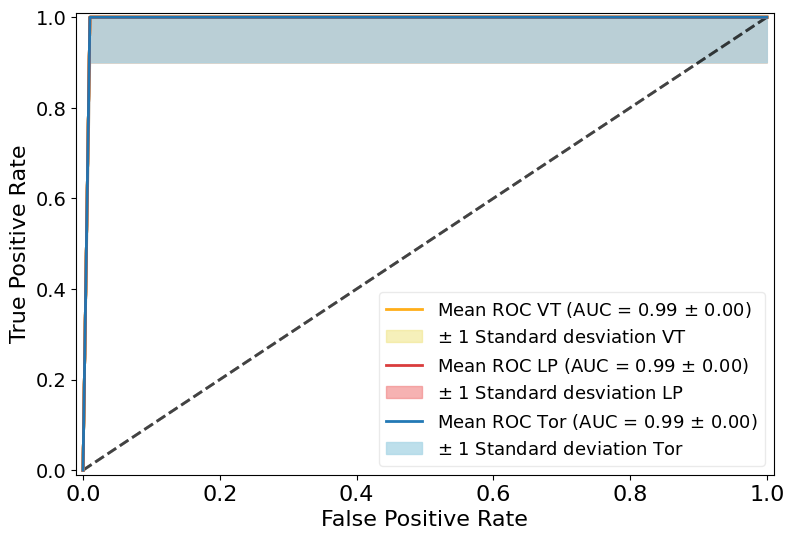

<Figure size 600x600 with 0 Axes>

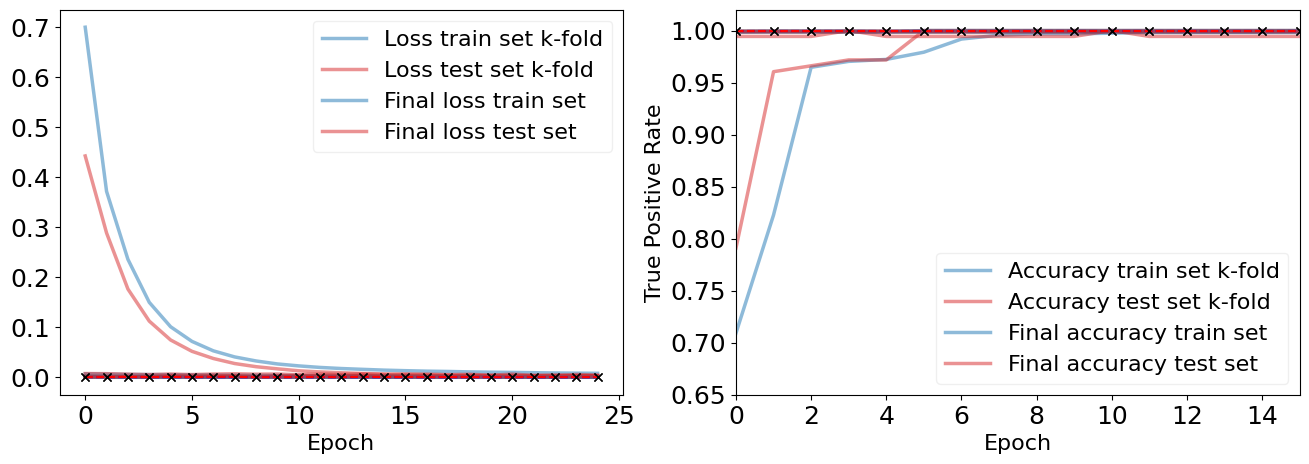

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

cv = StratifiedShuffleSplit(n_splits=6, random_state=True)
th_0 = []
th_1 = []
th_2 = []

y = np.round(y).astype(int)

print(cv)
StratifiedShuffleSplit(n_splits=6, random_state=True)

fig, ax = plt.subplots(1, figsize = (9, 6))
tprs_mean_0 = []
tprs_mean_1 = []
tprs_mean_2 = []
aucs_0 = []
aucs_1 = []
aucs_2 = []

corte0 = []
corte1 = []
corte2 = []
fold = 1

for train_index, test_index in cv.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # converte rótulos para formato one-hot encoding
  y_train = to_categorical(y_train, num_classes=3)
  y_test = to_categorical(y_test, num_classes=3)

  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', 'AUC'])
  # armazenar o tempo de início do treinamento
  time
  start_time = time.time()
  historia = clasificador.fit(X_train, y_train,
                           epochs=25,
                           batch_size=15,
                           validation_data=(X_test, y_test),
                           shuffle=True)
  # armazenar o tempo de fim do treinamento
  end_time = time.time()

  print("ENTRENAMIENTO EN EL FOLD %0.2f" %(fold))
  y_pred = clasificador.predict(X_test)

  tprs = []
  Corte = []
  thresholds = []

  base_fpr = np.linspace(0, 1, 101)
  mean_fpr = np.linspace(0, 1, 100)


  #Curva ROC para la clase VT

  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 0],  y_pred[:,0])
    auc1 = roc_auc_score(y_test[:, 0], y_pred[:, 0])

    # Elegir el umbral óptimo basado en una métrica (por ejemplo, F1-score)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    best_threshold = th[np.argmax(f1_scores)]

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_0.append(auc1)
  th_0.append(best_threshold)  ##################################################################################

  Corte.append(th[np.argmax(tpr - fpr)])
  corte0.append(Corte)  #########################################################################################
  ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k",
          alpha=0.2)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="orange",
      lw=2,
      alpha=0.9,
  )
  tprs_mean_0.append(mean_tpr)

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.xlabel('False Positive Rate', fontsize=16)


  #Curva ROC para la clase LP

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 1],  y_pred[:, 1])
    auc1 = roc_auc_score(y_test[:, 1], y_pred[:, 1])

    # Elegir el umbral óptimo basado en una métrica (por ejemplo, F1-score)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    best_threshold = th[np.argmax(f1_scores)]

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_1.append(auc1)
  th_1.append(best_threshold) ##################################################################################

  Corte.append(th[np.argmax(tpr - fpr)])
  corte1.append(Corte)  ########################################################################################

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="lightcoral",
      lw=2,
      alpha=0.99, # alpha es transparencia
  )
  tprs_mean_1.append(mean_tpr)

  #Curva ROC para la clase Tor

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 2],  y_pred[:, 2])
    auc1 = roc_auc_score(y_test[:, 2], y_pred[:, 2])

    # Elegir el umbral óptimo basado en una métrica (por ejemplo, F1-score)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    best_threshold = th[np.argmax(f1_scores)]

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_2.append(auc1)
  th_2.append(best_threshold) ##################################################################################

  Corte.append(th[np.argmax(tpr - fpr)])
  corte2.append(Corte)  ########################################################################################

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="lightblue",
      lw=2,
  )

  tprs_mean_2.append(mean_tpr)
  ax.legend(loc="lower right",fontsize = 8)
  plt.xticks(fontsize=16), plt.yticks(fontsize=14)


  import matplotlib.pyplot as plt
  plt.figure(5, figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(historia.history["loss"], color = 'tab:blue', alpha = 0.5, lw = 2.5)   #label="Pérdida train (Fold %0.2f)" %(fold)
  plt.plot(historia.history["val_loss"], color = 'tab:red', alpha = 0.5, lw = 2.5)
  plt.subplot(1,2,2)
  plt.plot(historia.history["categorical_accuracy"], color = 'tab:blue', alpha = 0.5, lw = 2.5)
  plt.plot(historia.history["val_categorical_accuracy"], color = 'tab:red', alpha = 0.5, lw = 2.5)

  fold = fold + 1

for train, test in cv.split(X, y):
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y[train]), np.bincount(y[test])))

plt.figure(3, figsize=(6,6))
tpr_0_final = np.mean(tprs_mean_0, axis=0)
std_tpr_0 = np.std(tpr_0_final, axis=0)
tprs_upper_0 = np.minimum(tpr_0_final + std_tpr_0, 1)
tprs_lower_0 = np.maximum(tpr_0_final - std_tpr_0, 0)

tpr_0_final[-1] = 1.0
mean_auc_0 = auc(mean_fpr, tpr_0_final)
std_auc_0 = np.std(aucs_0)
ax.plot(
    mean_fpr,
    tpr_0_final,
    color="orange",
    label=r"Mean ROC VT (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_0, std_auc_0),
    lw=2,
    alpha=0.9,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_0,
    tprs_upper_0,
    color="khaki",
    alpha=0.6,
    label="$\pm$ 1 Standard desviation VT",
)

tpr_1_final = np.mean(tprs_mean_1, axis=0)
std_tpr_1 = np.std(tpr_1_final, axis=0)
tprs_upper_1 = np.minimum(tpr_1_final + std_tpr_1, 1)
tprs_lower_1 = np.maximum(tpr_1_final - std_tpr_1, 0)

tpr_1_final[-1] = 1.0
mean_auc_1 = auc(mean_fpr, tpr_0_final)
std_auc_1 = np.std(aucs_1)
ax.plot(
    mean_fpr,
    tpr_1_final,
    color="tab:red",
    label=r"Mean ROC LP (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_1, std_auc_1),
    lw=2,
    alpha=0.9,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_1,
    tprs_upper_1,
    color="lightcoral",
    alpha=0.6,
    label="$\pm$ 1 Standard desviation LP",
)

tpr_2_final = np.mean(tprs_mean_2, axis=0)
std_tpr_2 = np.std(tpr_2_final, axis=0)
tprs_upper_2 = np.minimum(tpr_2_final + std_tpr_2, 1)
tprs_lower_2 = np.maximum(tpr_2_final - std_tpr_2, 0)

tpr_2_final[-1] = 1.0
mean_auc_2 = auc(mean_fpr, tpr_2_final)
std_auc_2 = np.std(aucs_2)
ax.plot(
    mean_fpr,
    tpr_2_final,
    color="tab:blue",
    label=r"Mean ROC Tor (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_2, std_auc_2),
    lw=2,
    alpha=0.99,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_2,
    tprs_upper_2,
    color="lightblue",
    alpha=0.8,
    label=r"$\pm$ 1 Standard deviation Tor",
)

ax.legend(loc="lower right",fontsize = 13, fancybox=True, framealpha=0.4)

ax.figure.savefig('ROC_PCA3.pdf', dpi=400, format='pdf')


plt.figure(5, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], 'xb--',mec='k', lw=1.5)
plt.plot(historia.history["val_loss"], 'xr--',mec='k', lw=1.5)
plt.xlabel('Epoch', fontsize=16)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)
plt.legend(labels=["Loss train set k-fold",
                   "Loss test set k-fold",
                   "Final loss train set",
                   "Final loss test set"],
           fontsize='16', fancybox=True, framealpha=0.3)
plt.subplot(1,2,2)
plt.plot(historia.history["categorical_accuracy"], 'xb--',mec='k', lw=1.5)
plt.plot(historia.history["val_categorical_accuracy"], 'xr--',mec='k', lw=1.5)
plt.xlim(0, 15)
plt.ylim(0.65, 1.02)
plt.xlabel('Epoch', fontsize=16)
plt.legend(labels=["Accuracy train set k-fold",
                   "Accuracy test set k-fold",
                   "Final accuracy train set",
                   "Final accuracy test set"],
           fontsize='16', fancybox=True, loc='lower right', framealpha=0.3)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)

plt.savefig('CrossVall_PCA.pdf', dpi=400, format='pdf')

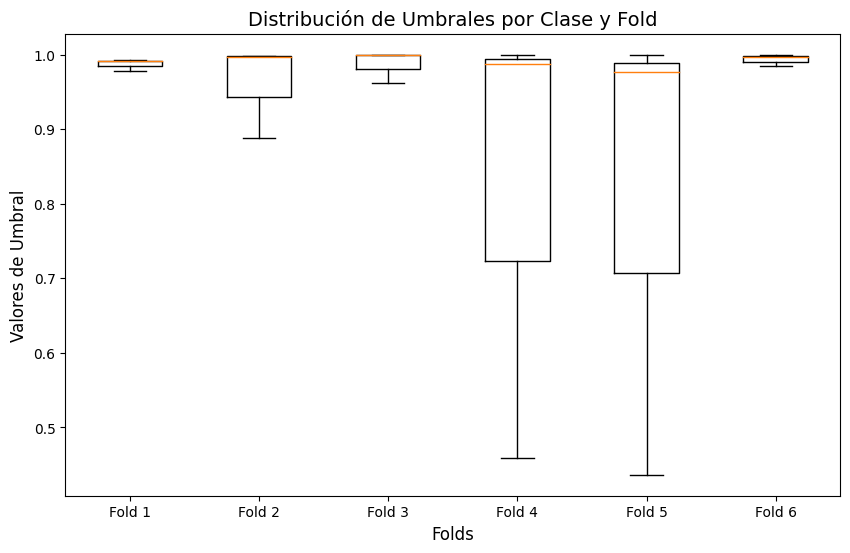

In [ ]:
import seaborn as sns
# Clases y etiquetas para los boxplots
clases = ['Clase VT', 'Clase LP', 'Clase TOR']
etiquetas = [f'Fold {i+1}' for i in range(len(corte0))]
data = np.array(corte0)
# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data.T, labels=etiquetas)
plt.xlabel('Folds', fontsize=12)
plt.ylabel('Valores de Umbral', fontsize=12)
plt.title('Distribución de Umbrales por Clase y Fold', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

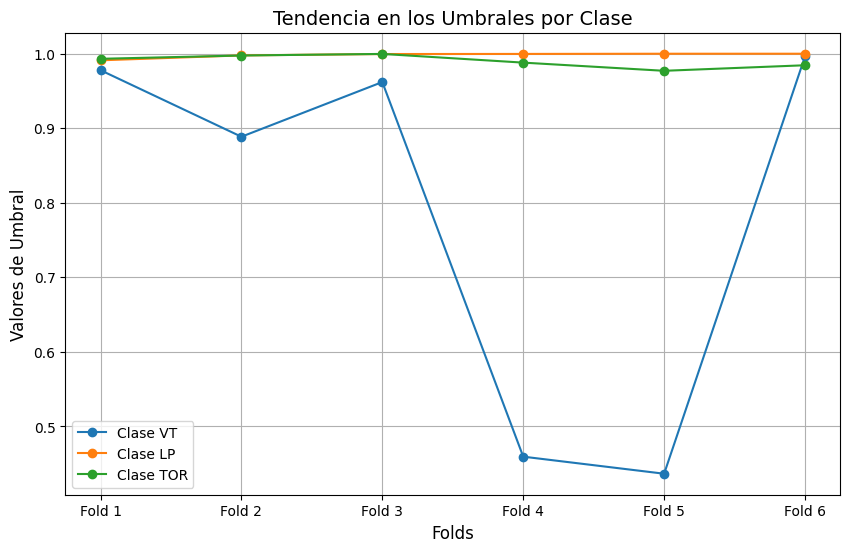

In [ ]:
# Umbrales por clase y fold (como listas de listas)
umbrales_clase_VT = [fila[0] for fila in corte0]
umbrales_clase_LP = [fila[1] for fila in corte0]
umbrales_clase_Tor = [fila[2] for fila in corte0]

# Valores de los folds (etiquetas)
folds = [f'Fold {i+1}' for i in range(len(umbrales_clase_VT))]

# Crear gráfico de líneas para mostrar tendencia
plt.figure(figsize=(10, 6))
plt.plot(folds, umbrales_clase_VT, marker='o', label='Clase VT')
plt.plot(folds, umbrales_clase_LP, marker='o', label='Clase LP')
plt.plot(folds, umbrales_clase_Tor, marker='o', label='Clase TOR')
plt.xlabel('Folds', fontsize=12)
plt.ylabel('Valores de Umbral', fontsize=12)
plt.title('Tendencia en los Umbrales por Clase', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

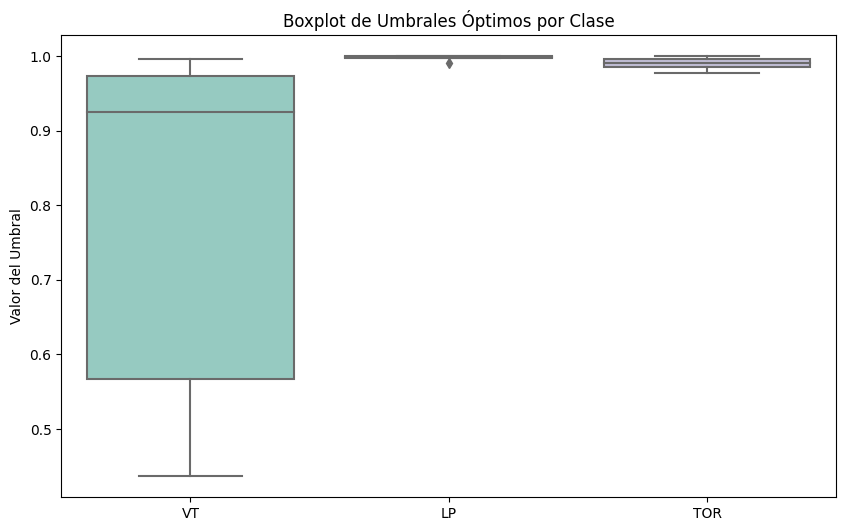

In [ ]:
# Crear un DataFrame de pandas para facilitar la visualización

data = pd.DataFrame({'VT': th_0, 'LP': th_1, 'TOR': th_2})

# Crear el gráfico de boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette='Set3')
plt.title('Boxplot de Umbrales Óptimos por Clase')
plt.ylabel('Valor del Umbral')
plt.show()

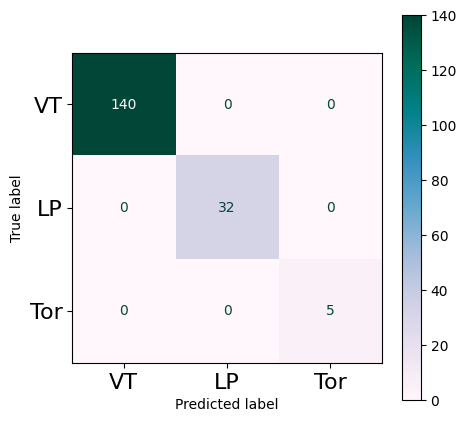

[[[ 37   0]
  [  0 140]]

 [[145   0]
  [  0  32]]

 [[172   0]
  [  0   5]]]
matriz VT  [[ 37   0]
 [  0 140]]
matriz LP  [[145   0]
 [  0  32]]
matriz Tor  [[172   0]
 [  0   5]]


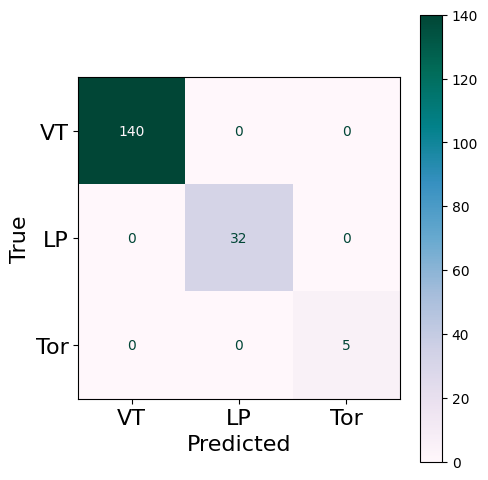

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

y_pred_ = np.rint(y_pred)
y_salida = []
for i in range(len(y_pred)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor')


y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('True', fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix.pdf', dpi=400, format='pdf')


plt.rcParams.update({'font.size': 16})
# plt.rc('font', **font)

cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)
cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]
print('matriz VT ', cmVT)
print('matriz LP ', cmLP)
print('matriz Tor ', cmTor)

In [ ]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[1,0]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[0,1]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[0,1]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1

In [ ]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')
# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')
# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')
# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

Especificidad VT: 100.0%
Especificidad LP: 100.0%
Especificidad Tor: 100.0%
Sensitividad VT: 100.0%
Sensitividad LP: 100.0%
Sensitividad Tor: 100.0%
Precisión VT: 100.0%
Precisión LP: 100.0%
Precisión Tor: 100.0%
f1 score VT: 100.0%
f1 score LP: 100.0%
f1 score Tor: 100.0%


In [ ]:
from sklearn.metrics import classification_report
y_pred_ = np.rint(y_pred)
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_test, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

          VT       1.00      1.00      1.00       140
          LP       1.00      1.00      1.00        32
         Tor       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177
 samples avg       1.00      1.00      1.00       177



# **VALIDACIÓN      DEL     MODELO**

In [ ]:
class_final = clasificador.predict(X_val)

14/14 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calcula los pesos de clase basados en la distribución de clases
class_weights = compute_class_weight('balanced', classes=np.unique(y_val), y=y_val)

# Convierte los pesos en un diccionario para su uso en Scikit-learn
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Imprime los pesos de clase
print("Pesos de clase:", class_weight_dict)

Pesos de clase: {0: 0.40678358856204605, 1: 1.8484055354993982, 2: 1462.8809523809523}


In [ ]:
# Calcula la clase predicha para cada muestra
clase_predicha = np.argmax(class_final, axis=1)
# Reemplaza los 1 por 0 y los 2 por 1
clase_predicha = np.where(clase_predicha == 1, 0, np.where(clase_predicha == 2, 1, clase_predicha))
# clase_predicha ahora contendrá la clase predicha para cada muestra
#print(clase_predicha)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

num_class = 3
y_final = clase_predicha

# Convertir y_val & y_final a una lista de enteros
y_val = [int(label) for label in y_val]
y_final = [int(label) for label in y_final]

# Cálculo de las Matrices de Confusión para cada clase
matrices = [confusion_matrix([y_true], [y_pred]) for y_true, y_pred in zip(y_val, y_final)]
total_TN = sum(cm.diagonal()[:-1].sum() for cm in matrices)  # Suma de todos los verdaderos negativos
total_FP = sum(cm[-1, :-1].sum() for cm in matrices)        # Suma de todos los falsos positivos
# Cálculo especificidad por cada clase
specif_per_class = []
for cm in matrices:
  TN = cm.diagonal()[:-1].sum()   # Suma de los TN de todas clases, menos la última
  FP = cm[-1, :-1].sum()    # Suma de FP de la última clase
  specif = 0 if (TN + FP) == 0 else TN / (TN + FP)
  specif_per_class.append(specif)

# Cálculo de métricas 'PONDERADAS' a la clase mayoritaria
recall_pond = recall_score(y_val, y_final, average='weighted')
f1_pond = f1_score(y_val, y_final, average='weighted')
esp_pond = sum(specif_per_class[i] * class_weights[i] for i in range(num_class)) / sum(class_weights)
g_mean_pond = (recall_pond * esp_pond) ** 0.5
auc_pond = roc_auc_score(y_val, class_final, average='weighted', multi_class='ovr')

# Cálculo de métricas 'MACRO' donde cada clase tiene igual importancia
recall_macro = recall_score(y_val, y_final, average='macro')
f1_macro = f1_score(y_val, y_final, average='macro')
esp_macro = sum(specif_per_class) / num_class
g_mean_macro = (recall_macro * esp_macro) ** 0.5
auc_macro = roc_auc_score(y_val, class_final, average='macro', multi_class='ovr')

# Cálculo de métricas 'MICRO' para una visión global del rendimiento del modelo
recall_micro = recall_score(y_val, y_final, average='micro')
f1_micro = f1_score(y_val, y_final, average='micro')
esp_micro = total_TN / (total_TN + total_FP)
g_mean_micro = (recall_micro * esp_micro) ** 0.5
auc_micro = roc_auc_score(y_val, class_final, average='micro', multi_class='ovr')

In [ ]:
metrics_dict = {
    'Metrica': ['Recall Ponderado', 'F1 Ponderado', 'Especificidad Ponderada', 'G-Mean Ponderado', 'AUC Ponderado',
                'Recall Macro', 'F1 Macro', 'Especificidad Macro', 'G-Mean Macro', 'AUC Macro',
                'Recall Micro', 'F1 Micro', 'Especificidad Micro', 'G-Mean Micro', 'AUC Micro'],
    'Valor': [recall_pond, f1_pond, esp_pond, g_mean_pond, auc_pond,
              recall_macro, f1_macro, esp_macro, g_mean_macro, auc_macro,
              recall_micro, f1_micro, esp_micro, g_mean_micro, auc_micro]
}
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

                    Metrica     Valor
0          Recall Ponderado  0.116551
1              F1 Ponderado  0.147856
2   Especificidad Ponderada  0.000000
3          G-Mean Ponderado  0.000000
4             AUC Ponderado  0.207333
5              Recall Macro  0.087393
6                  F1 Macro  0.075505
7       Especificidad Macro  0.000000
8              G-Mean Macro  0.000000
9                 AUC Macro  0.332909
10             Recall Micro  0.116551
11                 F1 Micro  0.116551
12      Especificidad Micro  0.000000
13             G-Mean Micro  0.000000
14                AUC Micro  0.306924


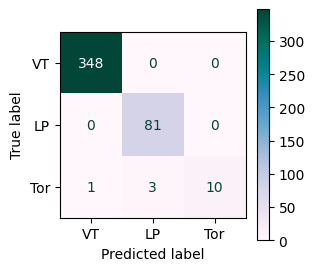

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define tus etiquetas legibles
etiquetas = ["VT", "LP", "Tor"]

# Convierte y_val a etiquetas legibles
y_true = np.array(etiquetas)[y_val.astype(int)]

# Convierte las predicciones en etiquetas legibles
y_salida = np.array(etiquetas)[np.argmax(class_final, axis=1)]

# Calcula la matriz de confusión
c = confusion_matrix(y_true, y_salida, labels=etiquetas)

# Muestra la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=etiquetas)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(ax=ax, cmap='PuBuGn', colorbar=True)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

# Convertir a one-hot encoding
y_pred_= np.argmax(class_final, axis=1)
# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Reformatear el vector de índices de clases para ajustarlo al formato esperado por OneHotEncoder
y_pred_ = y_pred_.reshape(-1, 1)
# Aplicar OneHotEncoder y obtener el vector en formato one-hot
y_pred_ = encoder.fit_transform(y_pred_)

# Convertir a one-hot encoding
y_val = np.array(y_val).astype(int)
num_classes = len(np.unique(y_val))
y_valida = np.eye(num_classes)[y_val]


target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_valida, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

          VT       1.00      1.00      1.00       348
          LP       0.96      1.00      0.98        81
         Tor       1.00      0.71      0.83        14

   micro avg       0.99      0.99      0.99       443
   macro avg       0.99      0.90      0.94       443
weighted avg       0.99      0.99      0.99       443
 samples avg       0.99      0.99      0.99       443



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


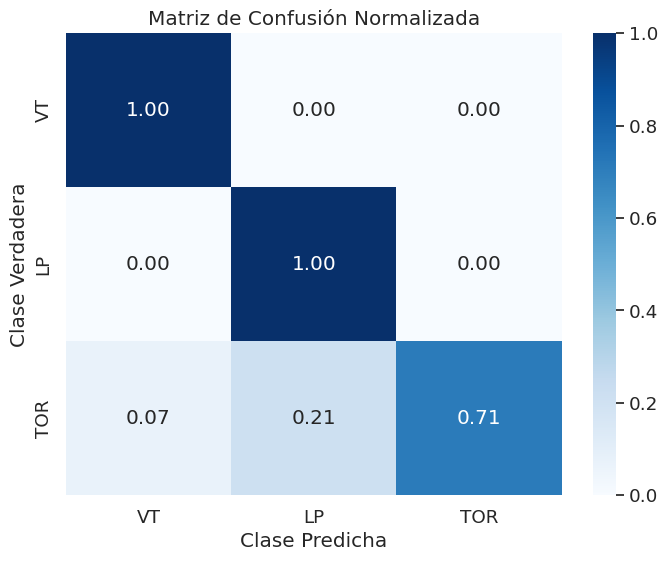

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supongamos que tienes tu matriz de confusión en 'confusion_matrix'
# Debes reemplazar esto con tus propios valores

# Calcula la matriz de confusión normalizada
row_sums = c.sum(axis=1, keepdims=True)
normalized_c = c / row_sums

# Define las etiquetas de las clases
labels = ["VT", "LP", "TOR"]

# Crea un mapa de calor (heatmap) con seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(normalized_c, annot=True, fmt=".2f",
            cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión Normalizada')
plt.show()

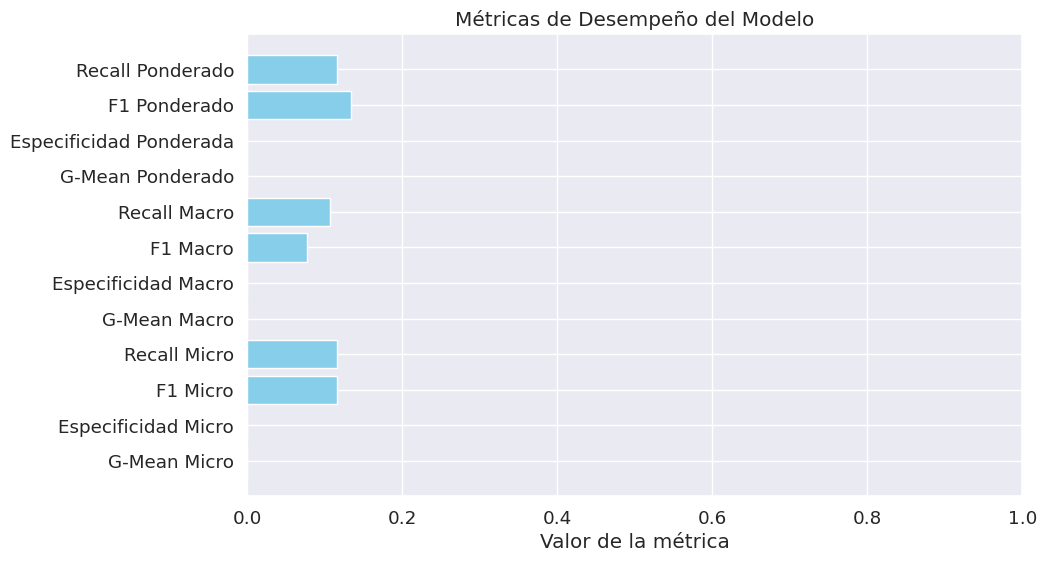

In [ ]:
import matplotlib.pyplot as plt

# Define las métricas y sus valores
metricas = ['Recall Ponderado', 'F1 Ponderado', 'Especificidad Ponderada', 'G-Mean Ponderado',
            'Recall Macro', 'F1 Macro', 'Especificidad Macro', 'G-Mean Macro',
            'Recall Micro', 'F1 Micro', 'Especificidad Micro', 'G-Mean Micro']

valores = [recall_pond, f1_pond, esp_pond, g_mean_pond,
           recall_macro, f1_macro, esp_macro, g_mean_macro,
           recall_micro, f1_micro, esp_micro, g_mean_micro]

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(metricas, valores, color='skyblue')
plt.xlabel('Valor de la métrica')
plt.title('Métricas de Desempeño del Modelo')
plt.xlim(0, 1)  # Ajusta el rango del eje x si es necesario
plt.gca().invert_yaxis()  # Invierte el eje y para que las métricas más altas estén arriba
plt.show()

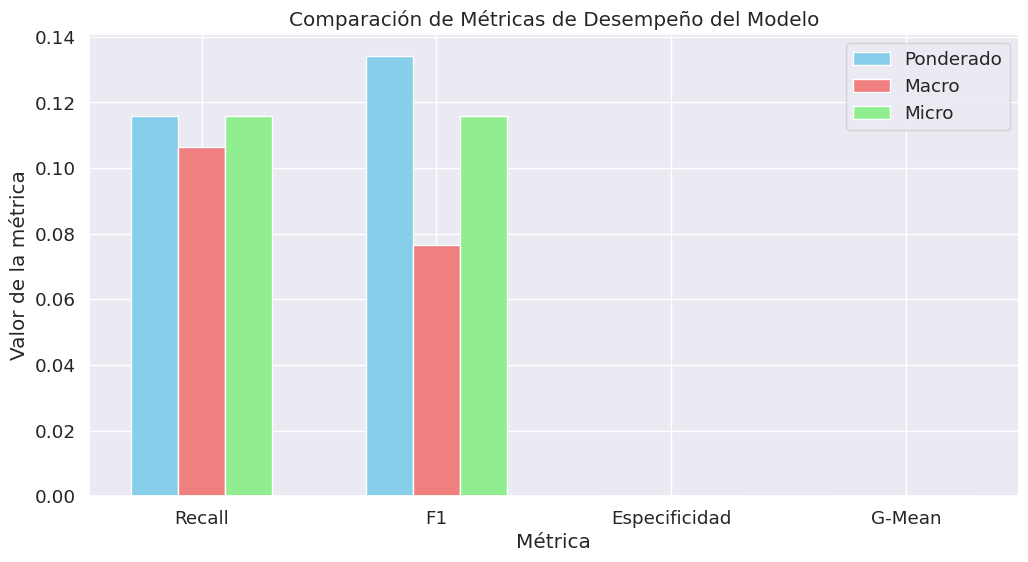

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define las métricas y sus valores
metricas = ['Recall', 'F1', 'Especificidad', 'G-Mean']
etiquetas = ['Ponderado', 'Macro', 'Micro']

# Valores de las métricas para las tres etiquetas
valores = np.array([[recall_pond, f1_pond, esp_pond, g_mean_pond],
                   [recall_macro, f1_macro, esp_macro, g_mean_macro],
                   [recall_micro, f1_micro, esp_micro, g_mean_micro]])

colores = ['skyblue', 'lightcoral', 'lightgreen']

# Crea un gráfico de barras superpuestas
plt.figure(figsize=(12, 6))

# Ancho de cada barra
bar_width = 0.2
index = np.arange(len(metricas))

for i in range(len(etiquetas)):
    plt.bar(index + i * bar_width, valores[i], bar_width, label=etiquetas[i], color=colores[i])

plt.xlabel('Métrica')
plt.ylabel('Valor de la métrica')
plt.title('Comparación de Métricas de Desempeño del Modelo')
plt.xticks(index + bar_width, metricas)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Crea un objeto LabelBinarizer
lb = LabelBinarizer()

# Convierte las etiquetas de clases en una matriz binaria
y_salida_bin = lb.fit_transform(y_salida)

In [ ]:
from sklearn.preprocessing import label_binarize

# Codificar las etiquetas verdaderas en un formato binario (one-hot encoding)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])  # Ajusta las clases según tu etiquetado

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Número de clases
num_classes = y_val_bin.shape[1]

# Crea un diccionario para almacenar las métricas por clase
class_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': [],
}

for class_idx in range(num_classes):
    y_true_class = y_val_bin[:, class_idx]
    y_pred_class = y_salida_bin[:, class_idx]

    # Calcula las métricas para la clase actual
    accuracy = accuracy_score(y_true_class, y_pred_class)
    precision = precision_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class)
    f1 = f1_score(y_true_class, y_pred_class)
    roc_auc = roc_auc_score(y_true_class, y_pred_class)

    # Almacena las métricas en el diccionario
    class_metrics['Accuracy'].append(accuracy)
    class_metrics['Precision'].append(precision)
    class_metrics['Recall'].append(recall)
    class_metrics['F1-Score'].append(f1)
    class_metrics['ROC AUC'].append(roc_auc)

In [ ]:
df = pd.DataFrame(class_metrics, index=[f'Clase {i}' for i in range(1, num_classes + 1)])  # Personaliza los índices según tus clases

# Muestra el DataFrame como una tabla
print(df)

         Accuracy  Precision    Recall  F1-Score   ROC AUC
Clase 1  0.179343   0.096774  0.000179  0.000357  0.496304
Clase 2  0.129816   0.014145  0.055686  0.022560  0.100905
Clase 3  0.711251   0.000056  0.071429  0.000113  0.391413


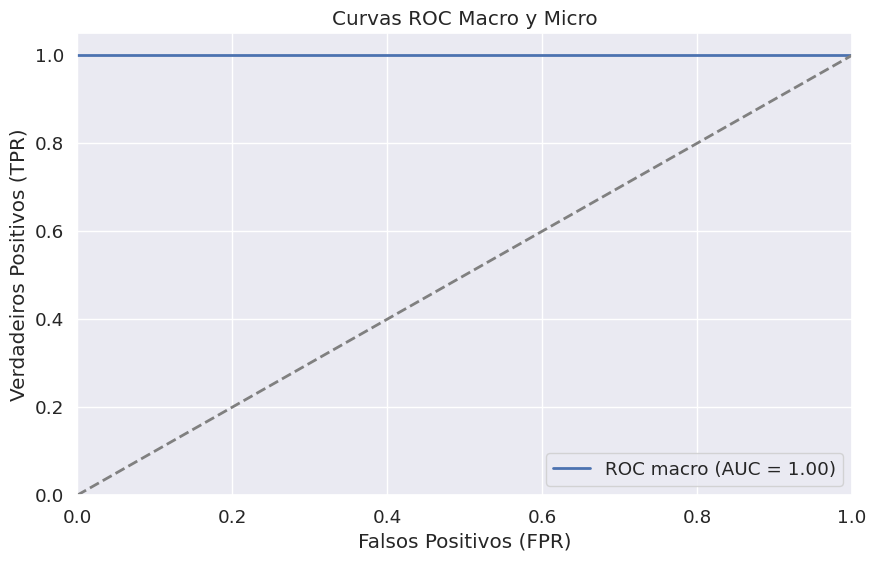

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcula las curvas ROC y los valores AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(etiquetas)):
    fpr[i], tpr[i], _ = roc_curve(y_valida[:, i], class_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula la curva ROC macro promediando los valores de todas las clases
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(etiquetas))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(etiquetas)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(etiquetas)
roc_auc_macro = auc(all_fpr, mean_tpr)

# Calcula la curva ROC micro agregando todas las predicciones y etiquetas verdaderas
all_y_true = y_valida.ravel()
all_y_scores = class_final.ravel()
fpr_micro, tpr_micro, _ = roc_curve(all_y_true, all_y_scores)
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Crea la gráfica de las curvas ROC
plt.figure(figsize=(10, 6))

# Curva ROC macro
plt.plot(all_fpr, mean_tpr, color='b', linestyle='-', lw=2, label='ROC macro (AUC = {:.2f})'.format(roc_auc_macro))

# Curva ROC micro
# plt.plot(fpr_micro, tpr_micro, color='darkorange', linestyle='-', lw=2, label='ROC micro (AUC = {:.2f})'.format(roc_auc_micro))

# Línea de referencia (clasificación aleatoria)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Configuración de la gráfica
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC Macro y Micro')
plt.legend(loc='lower right')
plt.grid(True)

# Muestra la gráfica
plt.show()

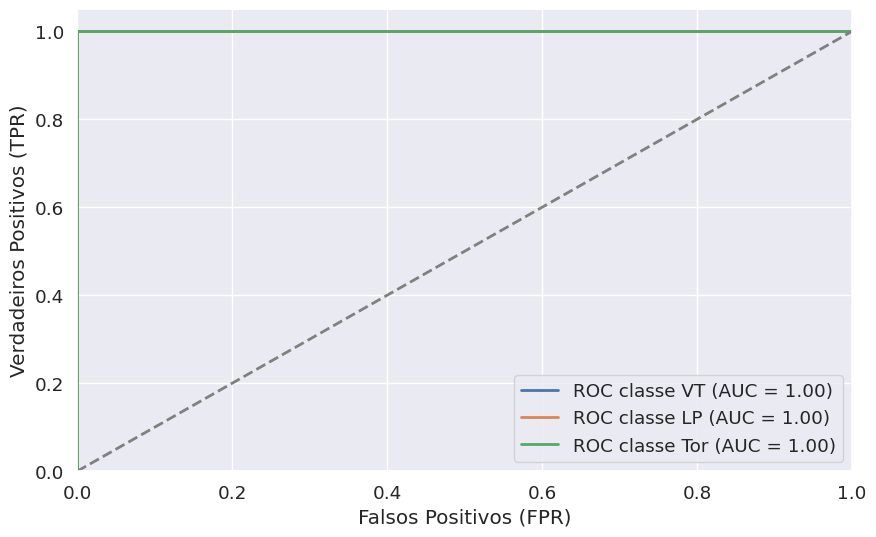

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Define las etiquetas de las clases
etiquetas = ["VT", "LP", "Tor"]

# Calcula las curvas ROC y los valores AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(etiquetas)):
    fpr[i], tpr[i], _ = roc_curve(y_valida[:, i], class_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Crea la gráfica de las curvas ROC en un solo gráfico
plt.figure(figsize=(10, 6))

# Trazar las curvas ROC para cada clase
for i in range(len(etiquetas)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC classe {} (AUC = {:.2f})'.format(etiquetas[i], roc_auc[i]))

# Línea de referencia (clasificación aleatoria)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Configuración de la gráfica
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdadeiros Positivos (TPR)')
# plt.title('Curvas ROC por Clase')
plt.legend(loc='lower right')
plt.grid(True)

# Muestra la gráfica
plt.show()

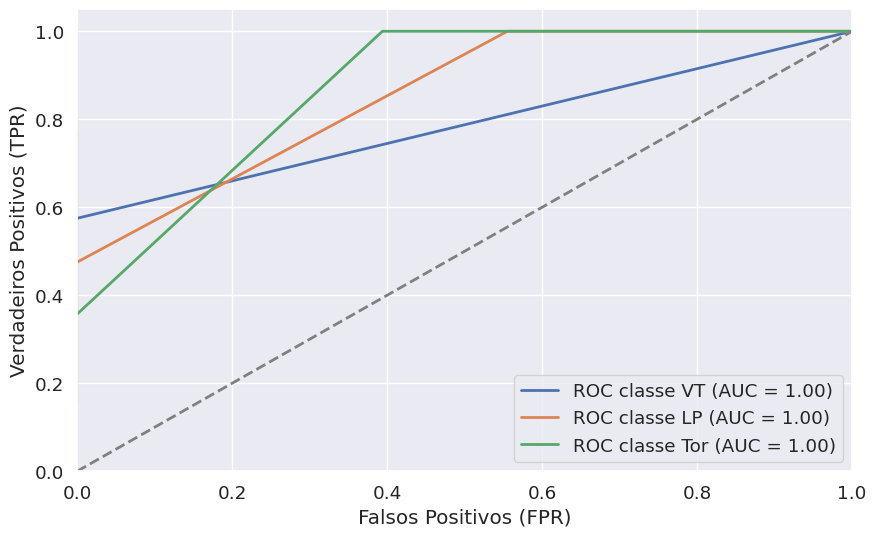

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define las etiquetas de las clases
etiquetas = ["VT", "LP", "Tor"]

# Calcula las curvas ROC y los valores AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(etiquetas)):
    fpr[i], tpr[i], _ = roc_curve(y_valida[:, i], class_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Crea la gráfica de las curvas ROC utilizando Seaborn y Matplotlib
plt.figure(figsize=(10, 6))

# Trazar las curvas ROC para cada clase utilizando Seaborn
for i in range(len(etiquetas)):
    sns.lineplot(x=fpr[i], y=tpr[i], lw=2, label='ROC classe {} (AUC = {:.2f})'.format(etiquetas[i], roc_auc[i]))

# Línea de referencia (clasificación aleatoria)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Configuración de la gráfica con Seaborn
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdadeiros Positivos (TPR)')
# plt.title('Curvas ROC por Clase')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

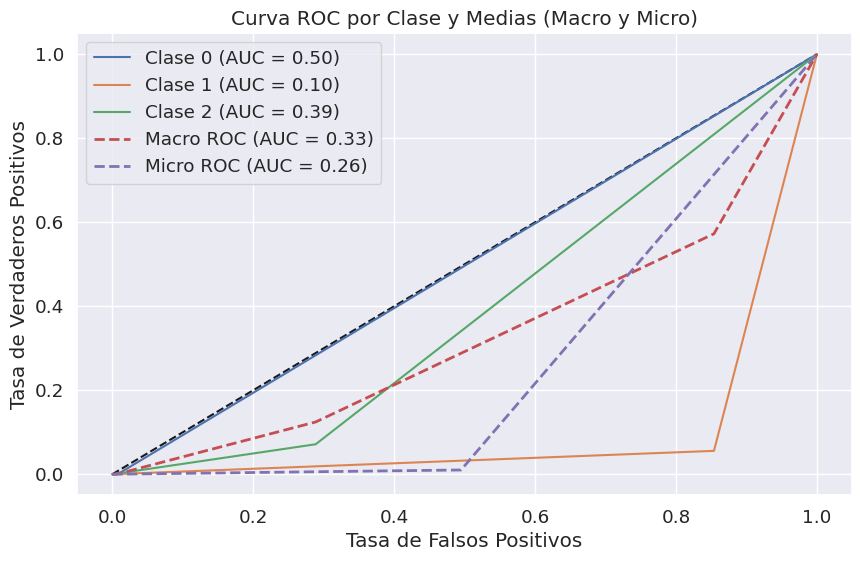

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np
import matplotlib.pyplot as plt

# Calcula las curvas ROC y los valores AUC por clase
fpr_class = {}
tpr_class = {}
roc_auc_class = {}
n_classes = num_classes  # Número de clases

for class_idx in range(n_classes):
    fpr_class[class_idx], tpr_class[class_idx], _ = roc_curve(y_val_bin[:, class_idx], y_salida_bin[:, class_idx])
    roc_auc_class[class_idx] = auc(fpr_class[class_idx], tpr_class[class_idx])

# Calcula la curva ROC macro
all_fpr = np.unique(np.concatenate([fpr_class[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr_class[i], tpr_class[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Calcula la curva ROC micro
fpr_micro, tpr_micro, _ = roc_curve(y_val_bin.ravel(), y_salida_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Gráfico de las curvas ROC por clase
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(n_classes):
    plt.plot(fpr_class[i], tpr_class[i], label=f'Clase {i} (AUC = {roc_auc_class[i]:.2f})')

# Curva ROC macro
plt.plot(fpr_macro, tpr_macro, label=f'Macro ROC (AUC = {roc_auc_macro:.2f})', linestyle='--', linewidth=2)

# Curva ROC micro
plt.plot(fpr_micro, tpr_micro, label=f'Micro ROC (AUC = {roc_auc_micro:.2f})', linestyle='--', linewidth=2)

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase y Medias (Macro y Micro)')
plt.legend(loc='best')
plt.show()

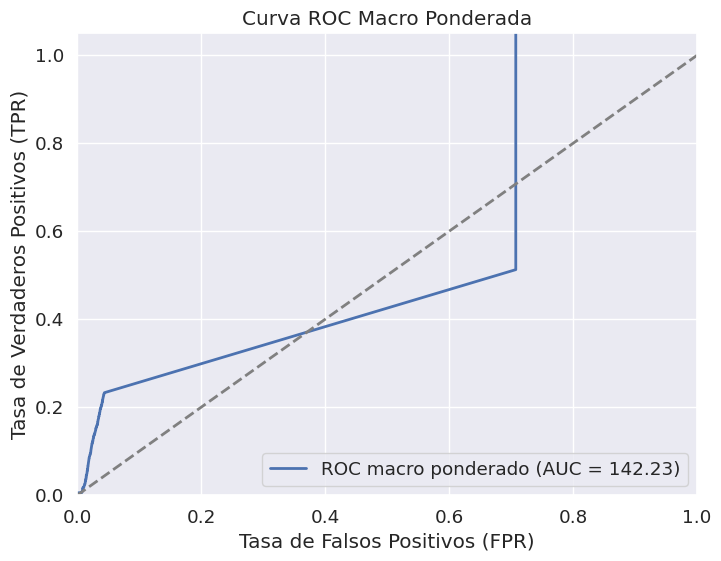

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define las etiquetas de las clases
etiquetas = ["VT", "LP", "Tor"]

# Calcula las curvas ROC y los valores AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(etiquetas)):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], class_final[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula la curva ROC macro ponderada promediando los valores de todas las clases
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(etiquetas))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(etiquetas)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]) * class_weight_dict[i]   # Aplicar pesos
mean_tpr /= len(etiquetas)
roc_auc_macro_ponderado = auc(all_fpr, mean_tpr)

# Crea la gráfica de la curva ROC macro ponderada
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', linestyle='-', lw=2,
         label='ROC macro ponderado (AUC = {:.2f})'.format(roc_auc_macro_ponderado))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Macro Ponderada')
plt.legend(loc='lower right')
plt.grid(True)

# Muestra la gráfica
plt.show()

Área bajo la curva Precision-Recall para la clase VT: 1.0000
Área bajo la curva Precision-Recall para la clase LP: 1.0000
Área bajo la curva Precision-Recall para la clase Tor: 1.0000


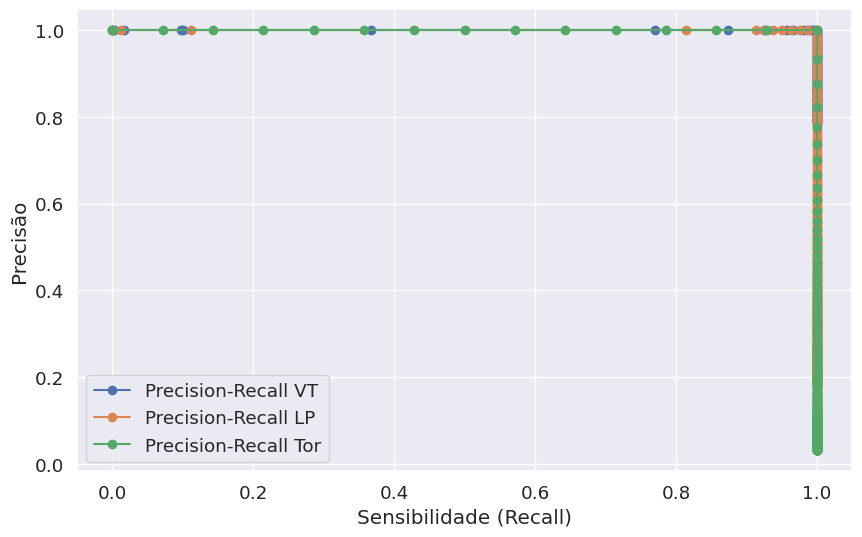

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Supongamos que tienes tus etiquetas verdaderas y las probabilidades de las predicciones
y_true = np.array(y_val)  # Convierte tus etiquetas verdaderas a un arreglo numpy
y_scores = class_final  # Reemplaza esto con las probabilidades de las predicciones

# Define las etiquetas de las clases
etiquetas = ["VT", "LP", "Tor"]
# Mapeo de etiquetas a valores numéricos
mapeo_etiquetas = {"VT": 0, "LP": 1, "Tor": 2}

# Inicializa un diccionario para almacenar las curvas de precisión-recuperación
precision_dict = {}
recall_dict = {}
thresholds_dict = {}

# Calcula y almacena las curvas de precisión-recuperación para cada clase
for etiqueta in etiquetas:
    y_true_class = (y_true == mapeo_etiquetas[etiqueta]).astype(int)
    y_scores_class = y_scores[:, mapeo_etiquetas[etiqueta]]
    precision, recall, thresholds = precision_recall_curve(y_true_class, y_scores_class)
    precision_dict[etiqueta] = precision
    recall_dict[etiqueta] = recall
    thresholds_dict[etiqueta] = thresholds

    area_under_curve = auc(recall, precision)
    print(f'Área bajo la curva Precision-Recall para la clase {etiqueta}: {area_under_curve:.4f}')

# Grafica las curvas de precisión-recuperación para cada clase en una sola figura
plt.figure(figsize=(10, 6))
for etiqueta in etiquetas:
    plt.plot(recall_dict[etiqueta], precision_dict[etiqueta], marker='o', linestyle='-', label=f'Precision-Recall {etiqueta}')



plt.xlabel('Sensibilidade (Recall)')
plt.ylabel('Precisão')
# plt.title('Curvas de Precision-Recall por Clase')
plt.legend(loc='best')
plt.grid(True)
plt.show()

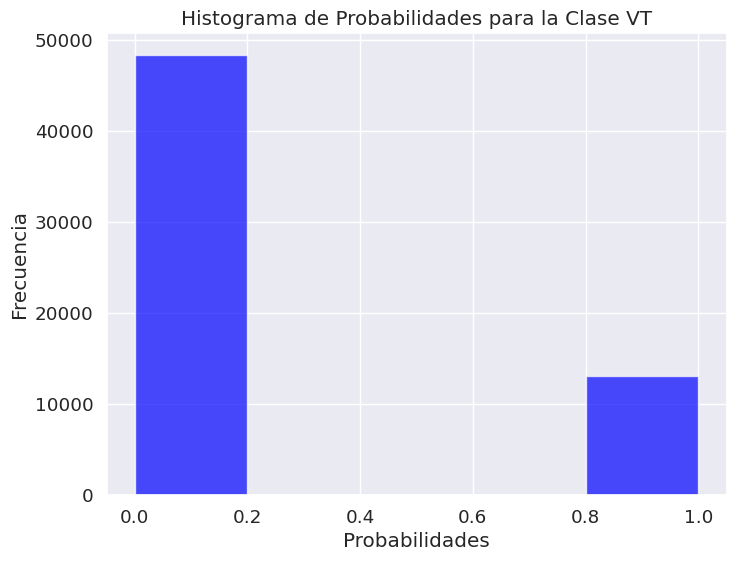

In [ ]:
import matplotlib.pyplot as plt

# Clase de interés (cambia a la que necesites)
clase_interes = "VT"

# Obtén las probabilidades de la clase de interés
probabilidades_clase_interes = class_final[:, etiquetas.index(clase_interes)]

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(probabilidades_clase_interes, bins=5, color='blue', alpha=0.7)
plt.title(f'Histograma de Probabilidades para la Clase {clase_interes}')
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.grid(True)

# Muestra el histograma
plt.show()

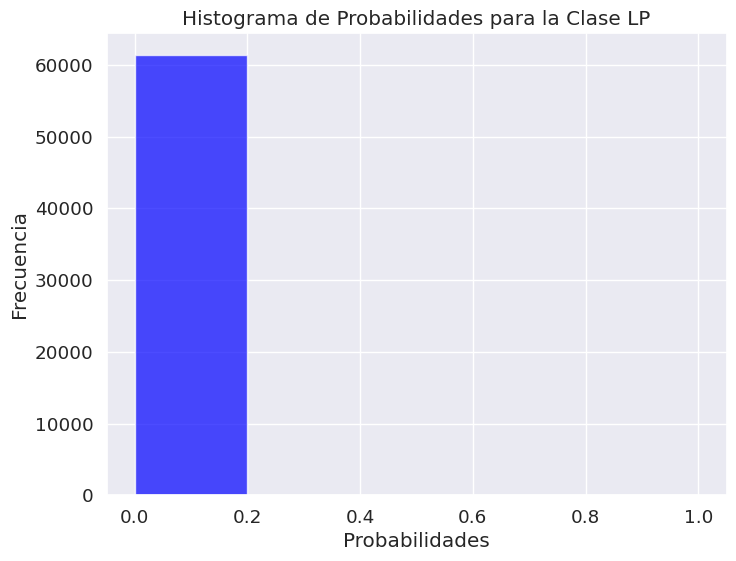

In [ ]:
import matplotlib.pyplot as plt

# Clase de interés (cambia a la que necesites)
clase_interes = "LP"

# Obtén las probabilidades de la clase de interés
probabilidades_clase_interes = class_final[:, etiquetas.index(clase_interes)]

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(probabilidades_clase_interes, bins=5, color='blue', alpha=0.7)
plt.title(f'Histograma de Probabilidades para la Clase {clase_interes}')
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.grid(True)

# Muestra el histograma
plt.show()

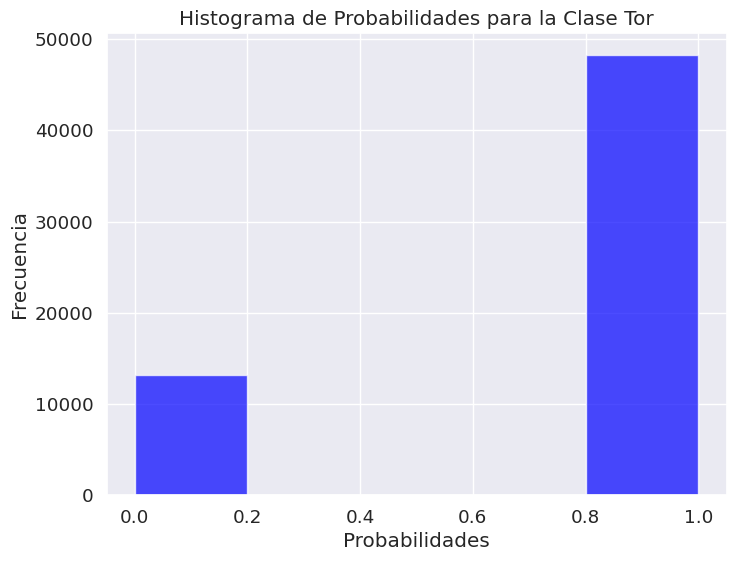

In [ ]:
import matplotlib.pyplot as plt

# Clase de interés (cambia a la que necesites)
clase_interes = "Tor"

# Obtén las probabilidades de la clase de interés
probabilidades_clase_interes = class_final[:, etiquetas.index(clase_interes)]

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(probabilidades_clase_interes, bins=5, color='blue', alpha=0.7)
plt.title(f'Histograma de Probabilidades para la Clase {clase_interes}')
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.grid(True)

# Muestra el histograma
plt.show()